In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# SI Model

Implement the SI model using the simple Euler method: 

$$S + I \rightarrow_{\beta} 2I$$

Verify that the model is correct by plotting the results and that is matches the analytical solution:

$$I(t) = \frac{N I_0}{I_0 + S_0 e^{-\beta t}}$$

Consider: 
- $\beta = 0.3$
- $N=10^5$
- $I_0=10$
- $T_{final}=100$
- $dt=0.05$

In [11]:
def si_model(beta, N, I0, T_final, dt=1):
    """
    Function to simulate the SI model.

    Parameters:
        beta (float): Infection rate
        N (int): Total population size
        I0 (int): Initial number of infected individuals
        T_final (float): Final time to simulate
        dt (float): simulation step 

    Returns:
        S (array): Array of susceptible individuals over time
        I (array): Array of infected individuals over time
        steps (array): Array of time steps over time
    """
    # define time steps
    steps = np.arange(0, T_final, dt)
    
    # initialization
    S = []
    I = []
    
    I.append(I0)
    S.append(N - I0)
    
    # simulation
    for i, step in enumerate(steps[1:]):
    #for i in range(len(steps) - 1):
        infected = beta * I[i] / N * dt * S[i]
        S.append(S[i] - infected)
        I.append(I[i] + infected)
    
    return S, I, steps

def si_analytical_solution(beta, N, I0, t):
    return N * I0 / (I0 + (N - I0) * np.exp(-beta * t))

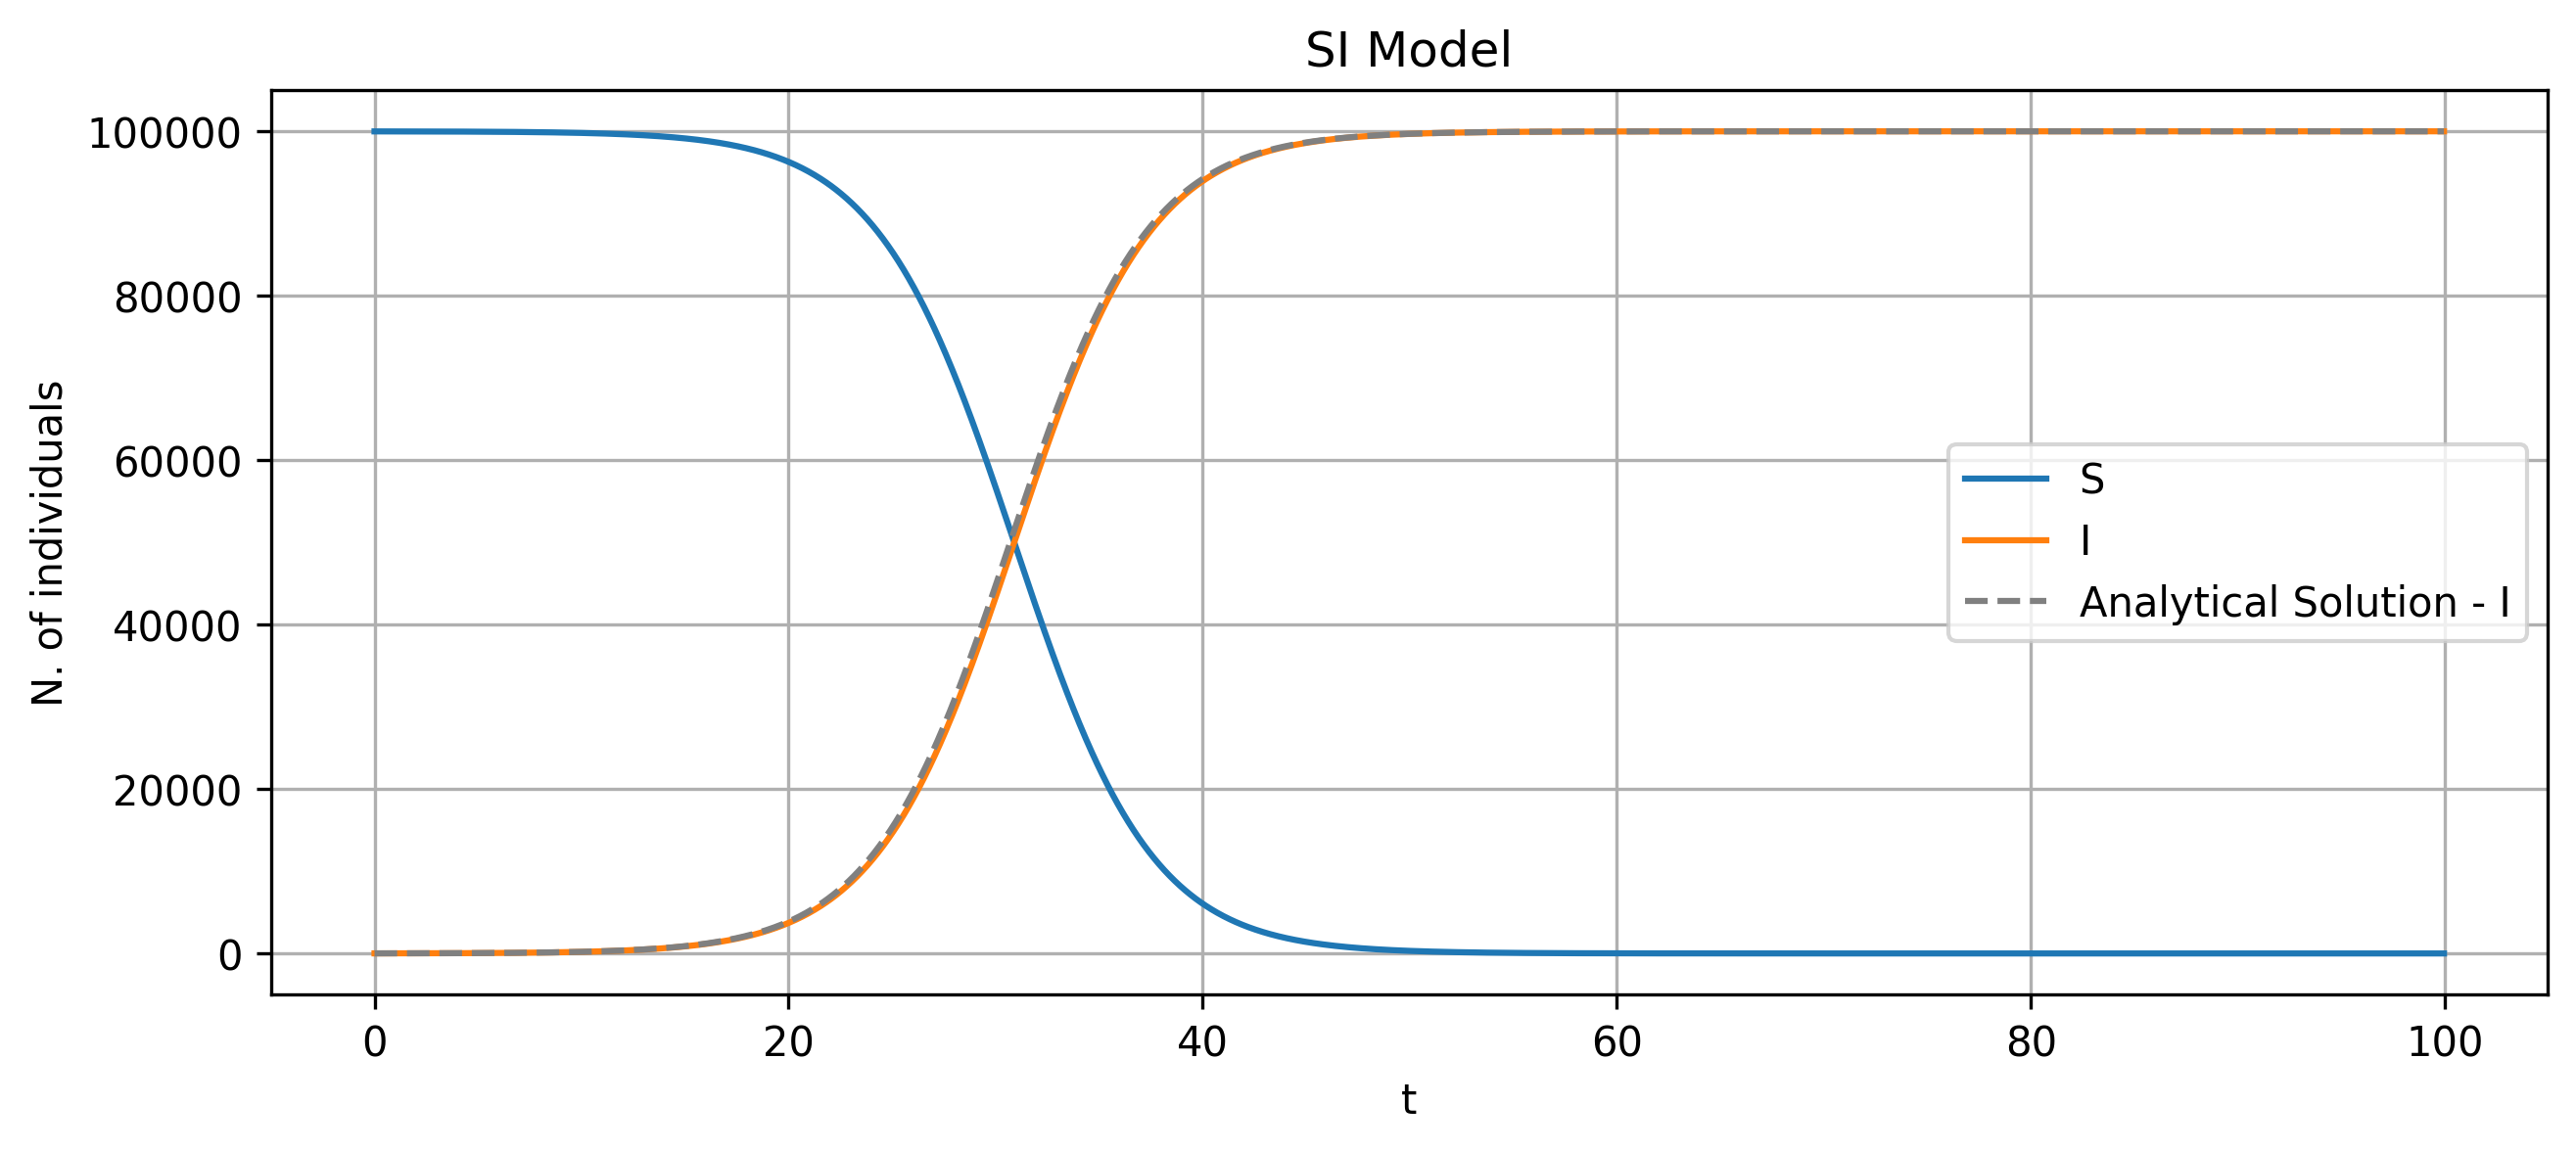

In [27]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 4))

ax.plot(steps, S, label="S")
ax.plot(steps, I, label="I")
ax.plot(steps, I_solution, linestyle= "--", color="grey", label="Analytical Solution - I")
ax.legend()

ax.set_ylabel("N. of individuals")
ax.set_xlabel("t")
ax.set_title("SI Model")
ax.grid()

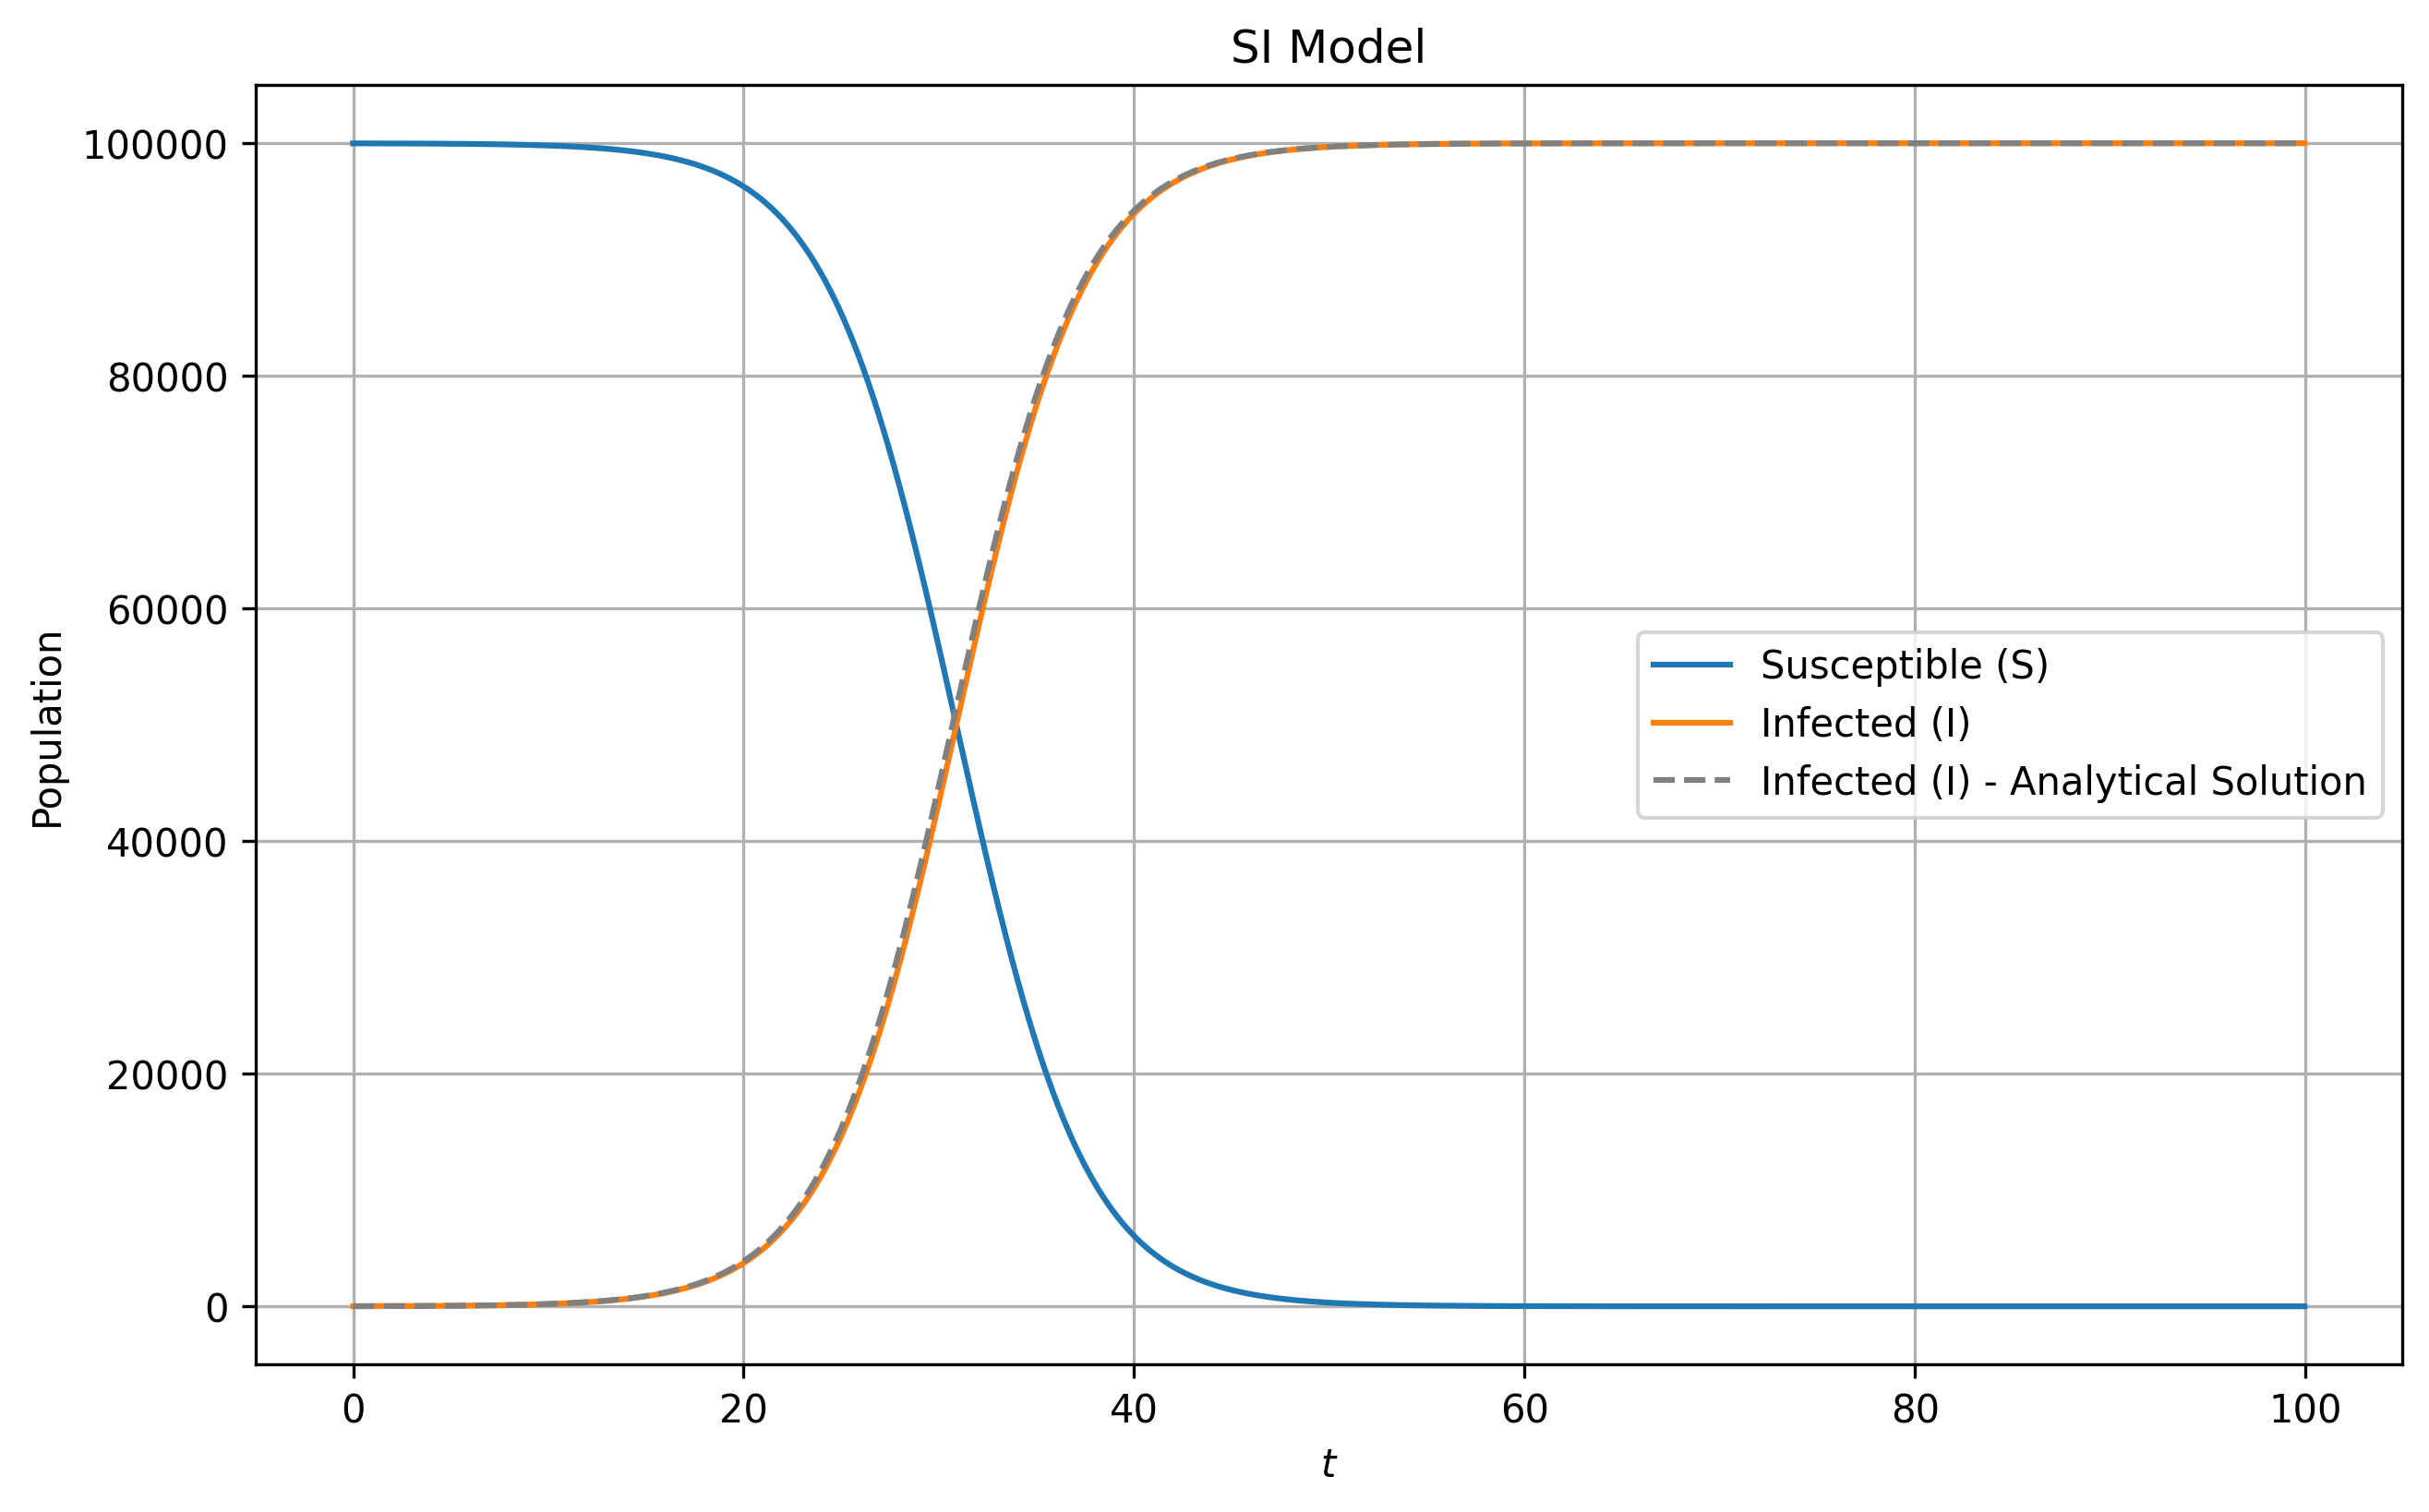

In [12]:
S, I, steps = si_model(beta=0.3, N=10**5, I0=10, T_final=100, dt=0.05)
I_solution = np.array([si_analytical_solution(beta=0.3, N=10**5, I0=10, t=t) for t in steps])

# plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(steps, S, label='Susceptible (S)')
plt.plot(steps, I, label='Infected (I)')
plt.plot(steps, I_solution, label='Infected (I) - Analytical Solution', color="grey", linestyle="--")

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SI Model')
plt.legend()
plt.grid(True)
plt.show()

# SIS Model

Implement the SIS model using the simple Euler method.

$$S + I \rightarrow_{\beta} 2I$$
$$I \rightarrow_{\mu} S$$

Verify that the model is correct by plotting the results and that is matches the analytical solution:

$$I(t) = \frac{N (\beta - \mu) I_0}{\beta I_0 + (\beta S_0 - \mu N) e^{-\mu (R_0 -1) t}}$$


Consider: 
- $\beta = 0.3$
- $\mu = 0.1$
- $N=10^5$
- $I_0=10$
- $T_{final}=100$
- $dt=0.05$

In [28]:
def sis_model(beta, mu, N, I0, T_final, dt=1):
    """
    Function to simulate the SIS model.

    Parameters:
        beta (float): Infection rate
        mu (float): Recovery rate
        N (int): Total population size
        I0 (int): Initial number of infected individuals
        T_final (float): Final time to simulate

    Returns:
        S (array): Array of susceptible individuals over time
        I (array): Array of infected individuals over time
        steps (array): Array of time steps over time
    """
    # define time steps
    steps = np.arange(0, T_final, dt)
    
    # initialization
    S = []
    I = []
    
    I.append(I0)
    S.append(N - I0)
    
    # simulation
    for i, step in enumerate(steps[1:]):
    #for i in range(len(steps) - 1):
        infected = beta * I[i] / N * dt * S[i]
        recovered = mu * I[i] * dt
        
        S.append(S[i] - infected + recovered)
        I.append(I[i] + infected - recovered)
    
    return S, I, steps

def sis_analytical_solution(beta, mu, N, I0, t):
    return (N * (beta - mu) * I0) / (beta * I0 + (beta * (N - I0) - mu * N) * np.exp(-mu * (beta / mu - 1) * t))

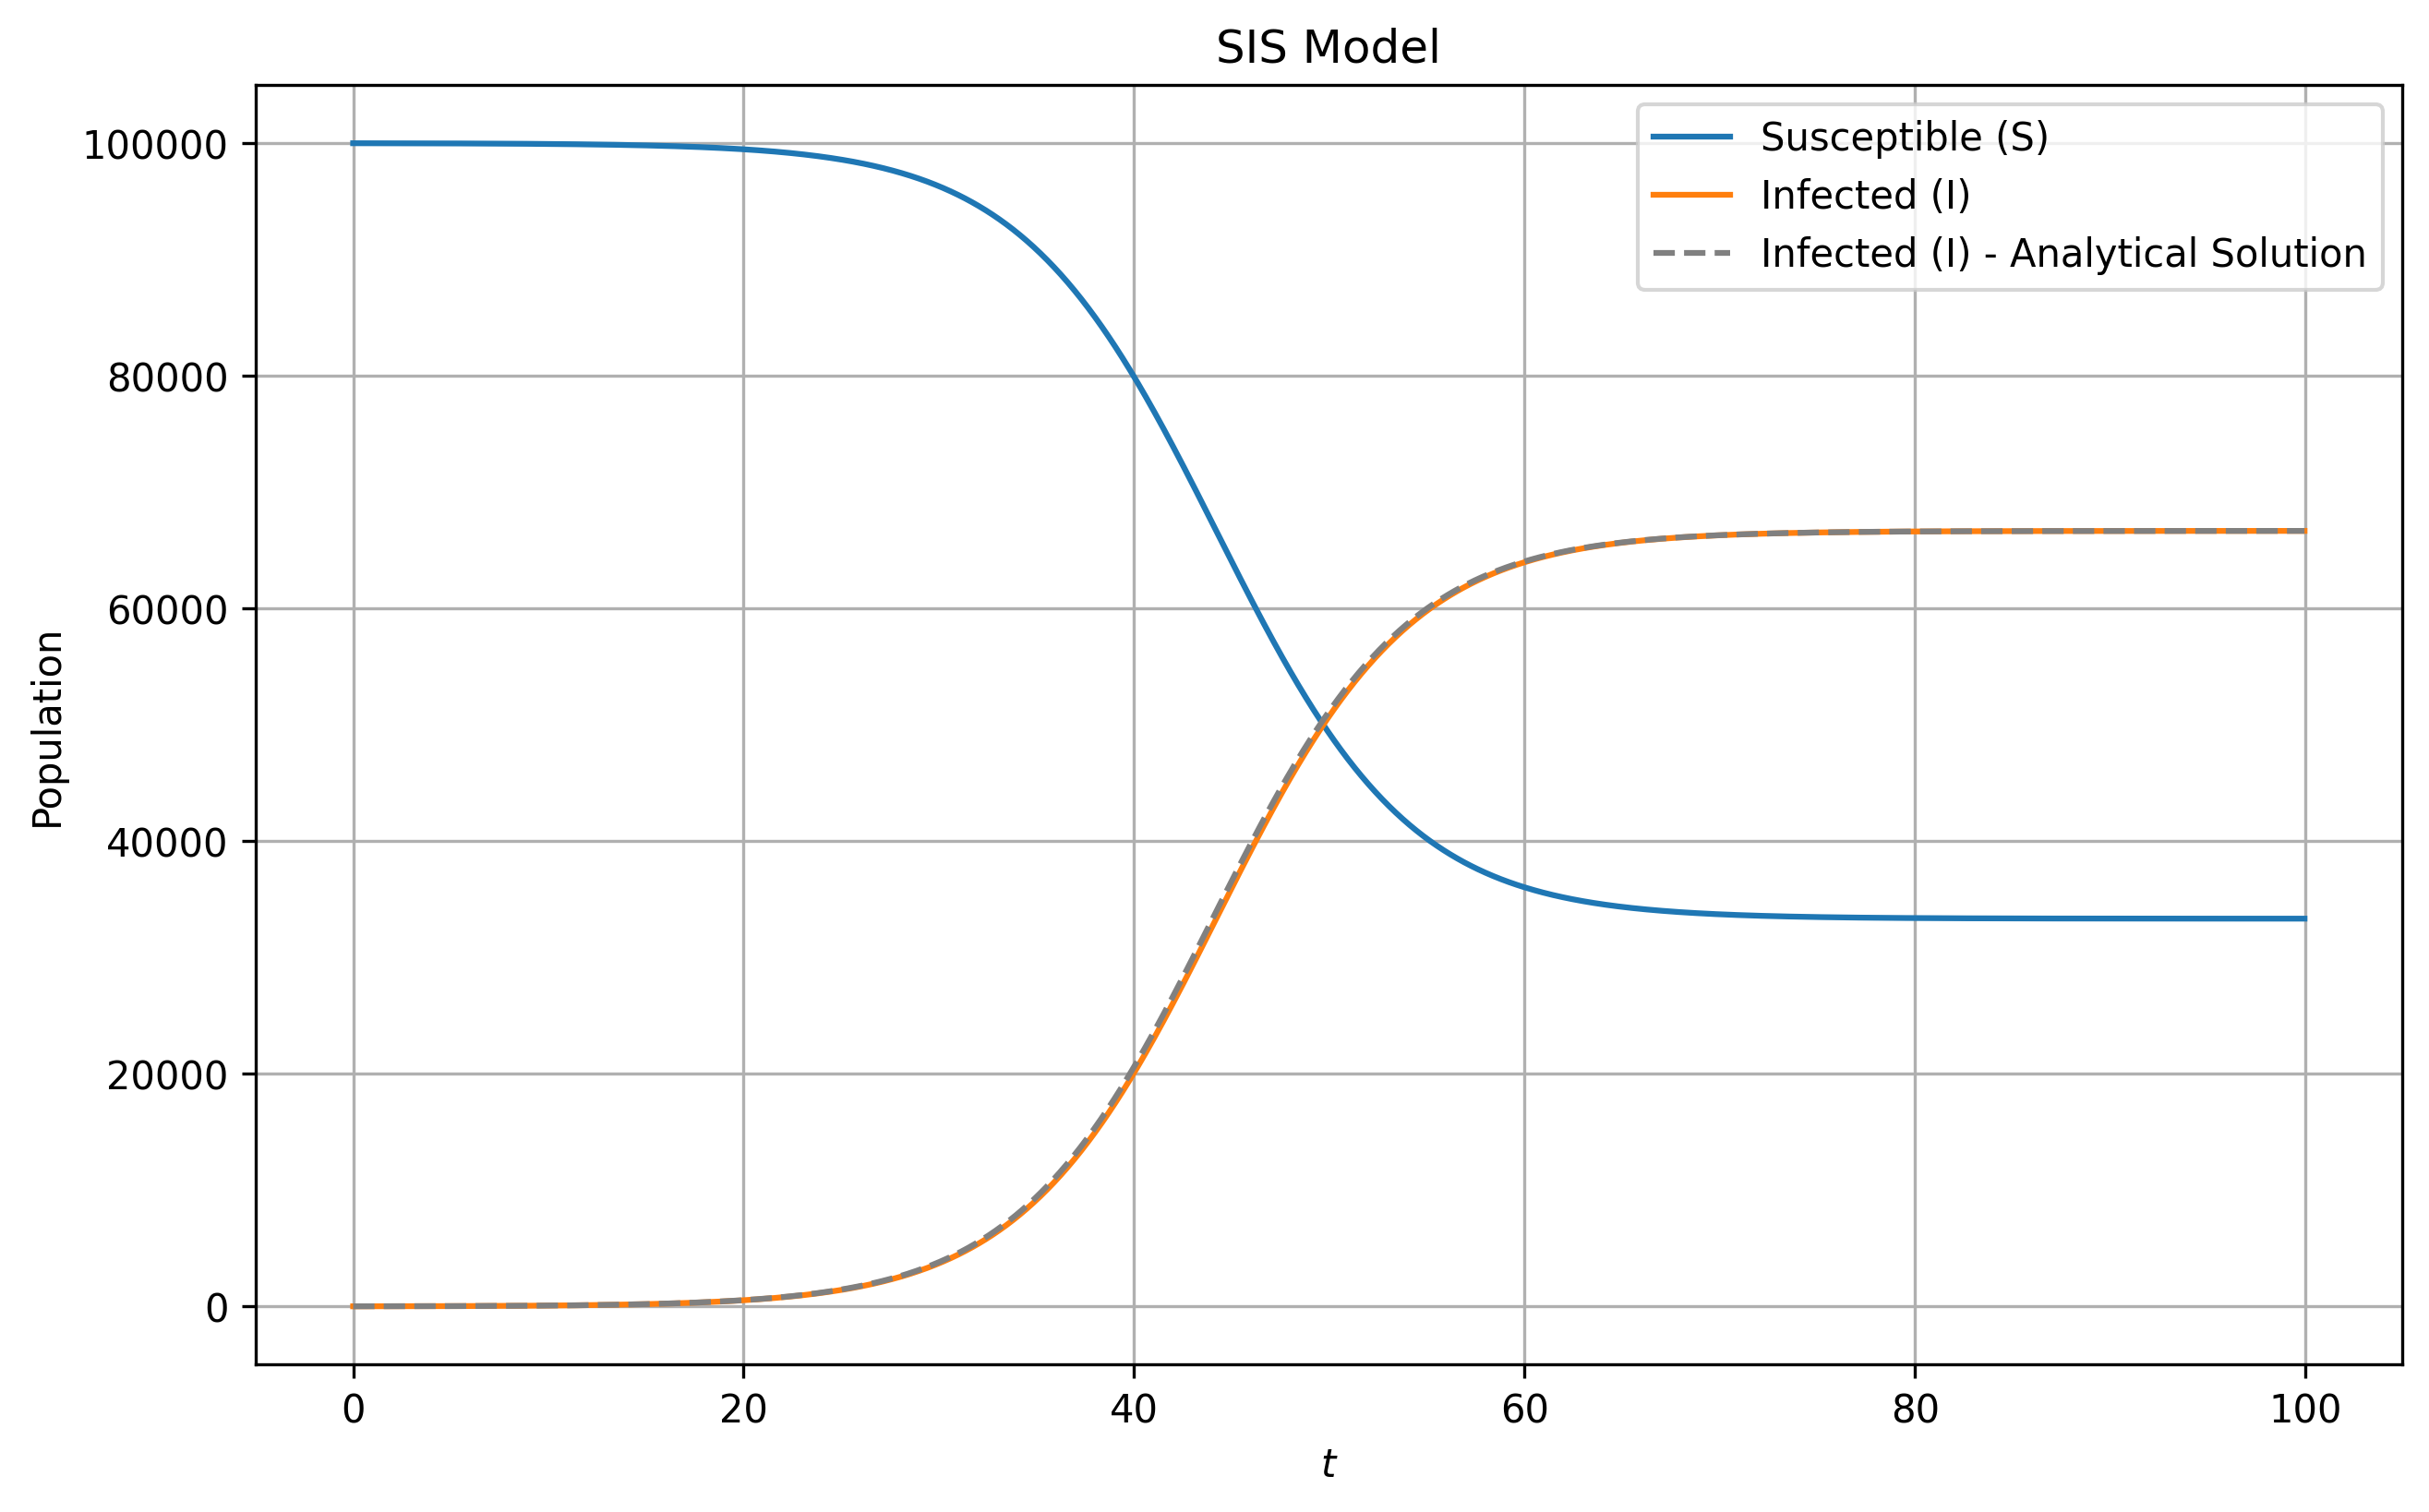

In [36]:
S, I, steps = sis_model(beta=0.3, mu=0.1, N=10**5, I0=10, T_final=100, dt=0.05)
I_solution = np.array([sis_analytical_solution(beta=0.3, mu=0.1, N=10**5, I0=10, t=t) for t in steps])

# plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(steps, S, label='Susceptible (S)')
plt.plot(steps, I, label='Infected (I)')
plt.plot(steps, I_solution, label='Infected (I) - Analytical Solution', color="grey", linestyle="--")

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SIS Model')
plt.legend()
plt.grid(True)
plt.show()

Verify the equilibrium state of the SIS model:

$$I(\infty) = N (1 - \frac{1}{R_0})$$



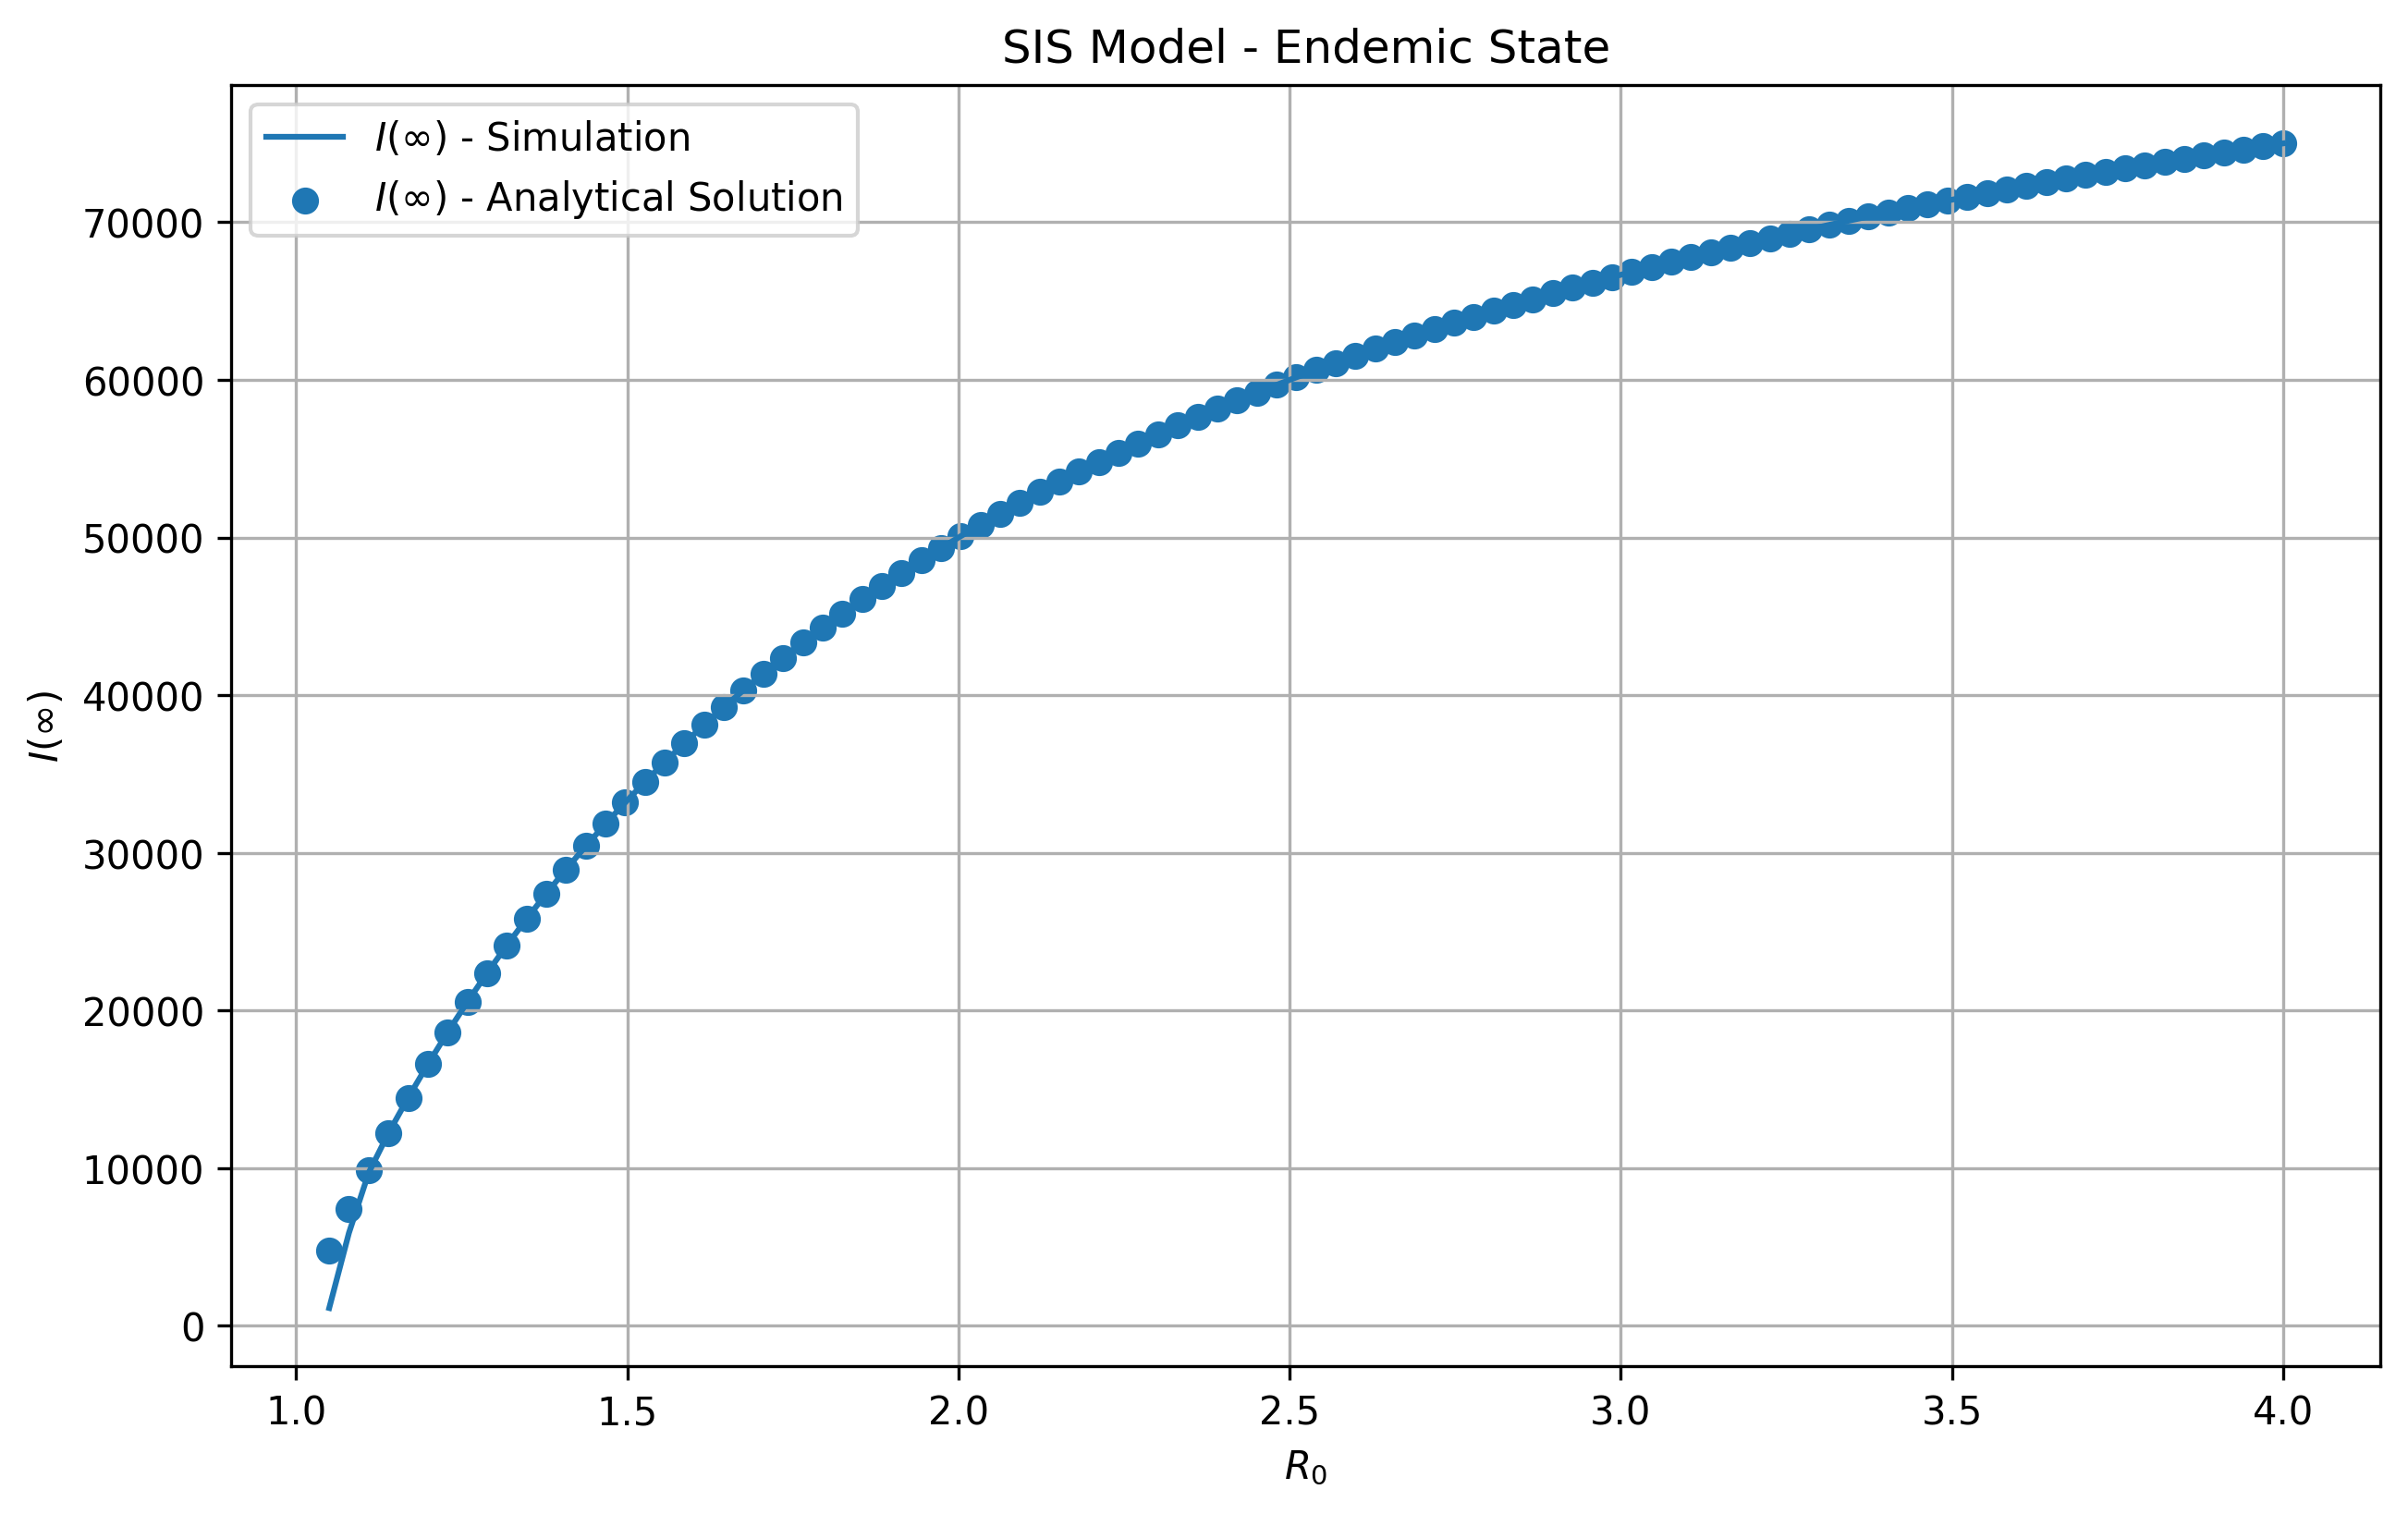

In [37]:
def equilibrium_SIS(beta, mu, N): 
    return N * (1 - mu / beta)

mu = 0.1
N, I0 = 10**5, 10

I_inf, I_inf_analytical = [], []
R0s = np.linspace(1.05, 4, 100)
for R0 in R0s:
    beta = R0 * mu
    
    # I_inf simulated 
    S, I, steps = sis_model(beta=beta, mu=mu, N=N, I0=I0, T_final=1000, dt=0.05)
    I_inf.append(I[-1])
    
    # I_inf analytical 
    I_inf_analytical.append(equilibrium_SIS(beta, mu, N))


# plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(R0s, I_inf, label='$I(\\infty)$ - Simulation')
plt.scatter(R0s, I_inf_analytical, label='$I(\\infty)$ - Analytical Solution')

plt.xlabel('$R_0$')
plt.ylabel('$I(\\infty)$')
plt.title('SIS Model - Endemic State')
plt.legend()
plt.grid(True)
plt.show()

# SIR Model

Implement the SIR model using the simple Euler method.

$$S + I \rightarrow_{\beta} 2I$$
$$I \rightarrow_{\mu} R$$

Verify that the model is correct by plotting the results.

Consider: 
- $\beta = 0.3$
- $\mu = 0.1$
- $N=10^5$
- $I_0=10$
- $T_{final}=100$
- $dt=0.05$

In [38]:
def sir_model(beta, mu, N, I0, T_final, dt=1):
    """
    Function to simulate the SIR model.

    Parameters:
        beta (float): Infection rate
        mu (float): Recovery rate
        N (int): Total population size
        I0 (int): Initial number of infected individuals
        T_final (float): Final time to simulate

    Returns:
        S (array): Array of susceptible individuals over time
        I (array): Array of infected individuals over time
        R (array): Array of recovered individuals over time
        steps (array): Array of time steps over time
    """
    # define time steps
    steps = np.arange(0, T_final, dt)
    
    # initialization
    S = []
    I = []
    R = []
    
    I.append(I0)
    S.append(N - I0)
    R.append(0)
    
    # simulation
    for i, step in enumerate(steps[1:]):
    #for i in range(len(steps) - 1):
        infected = beta * I[i] / N * dt * S[i]
        recovered = mu * I[i] * dt
        S.append(S[i] - infected)
        I.append(I[i] + infected - recovered)
        R.append(R[i] + recovered)
    
    return S, I, R, steps

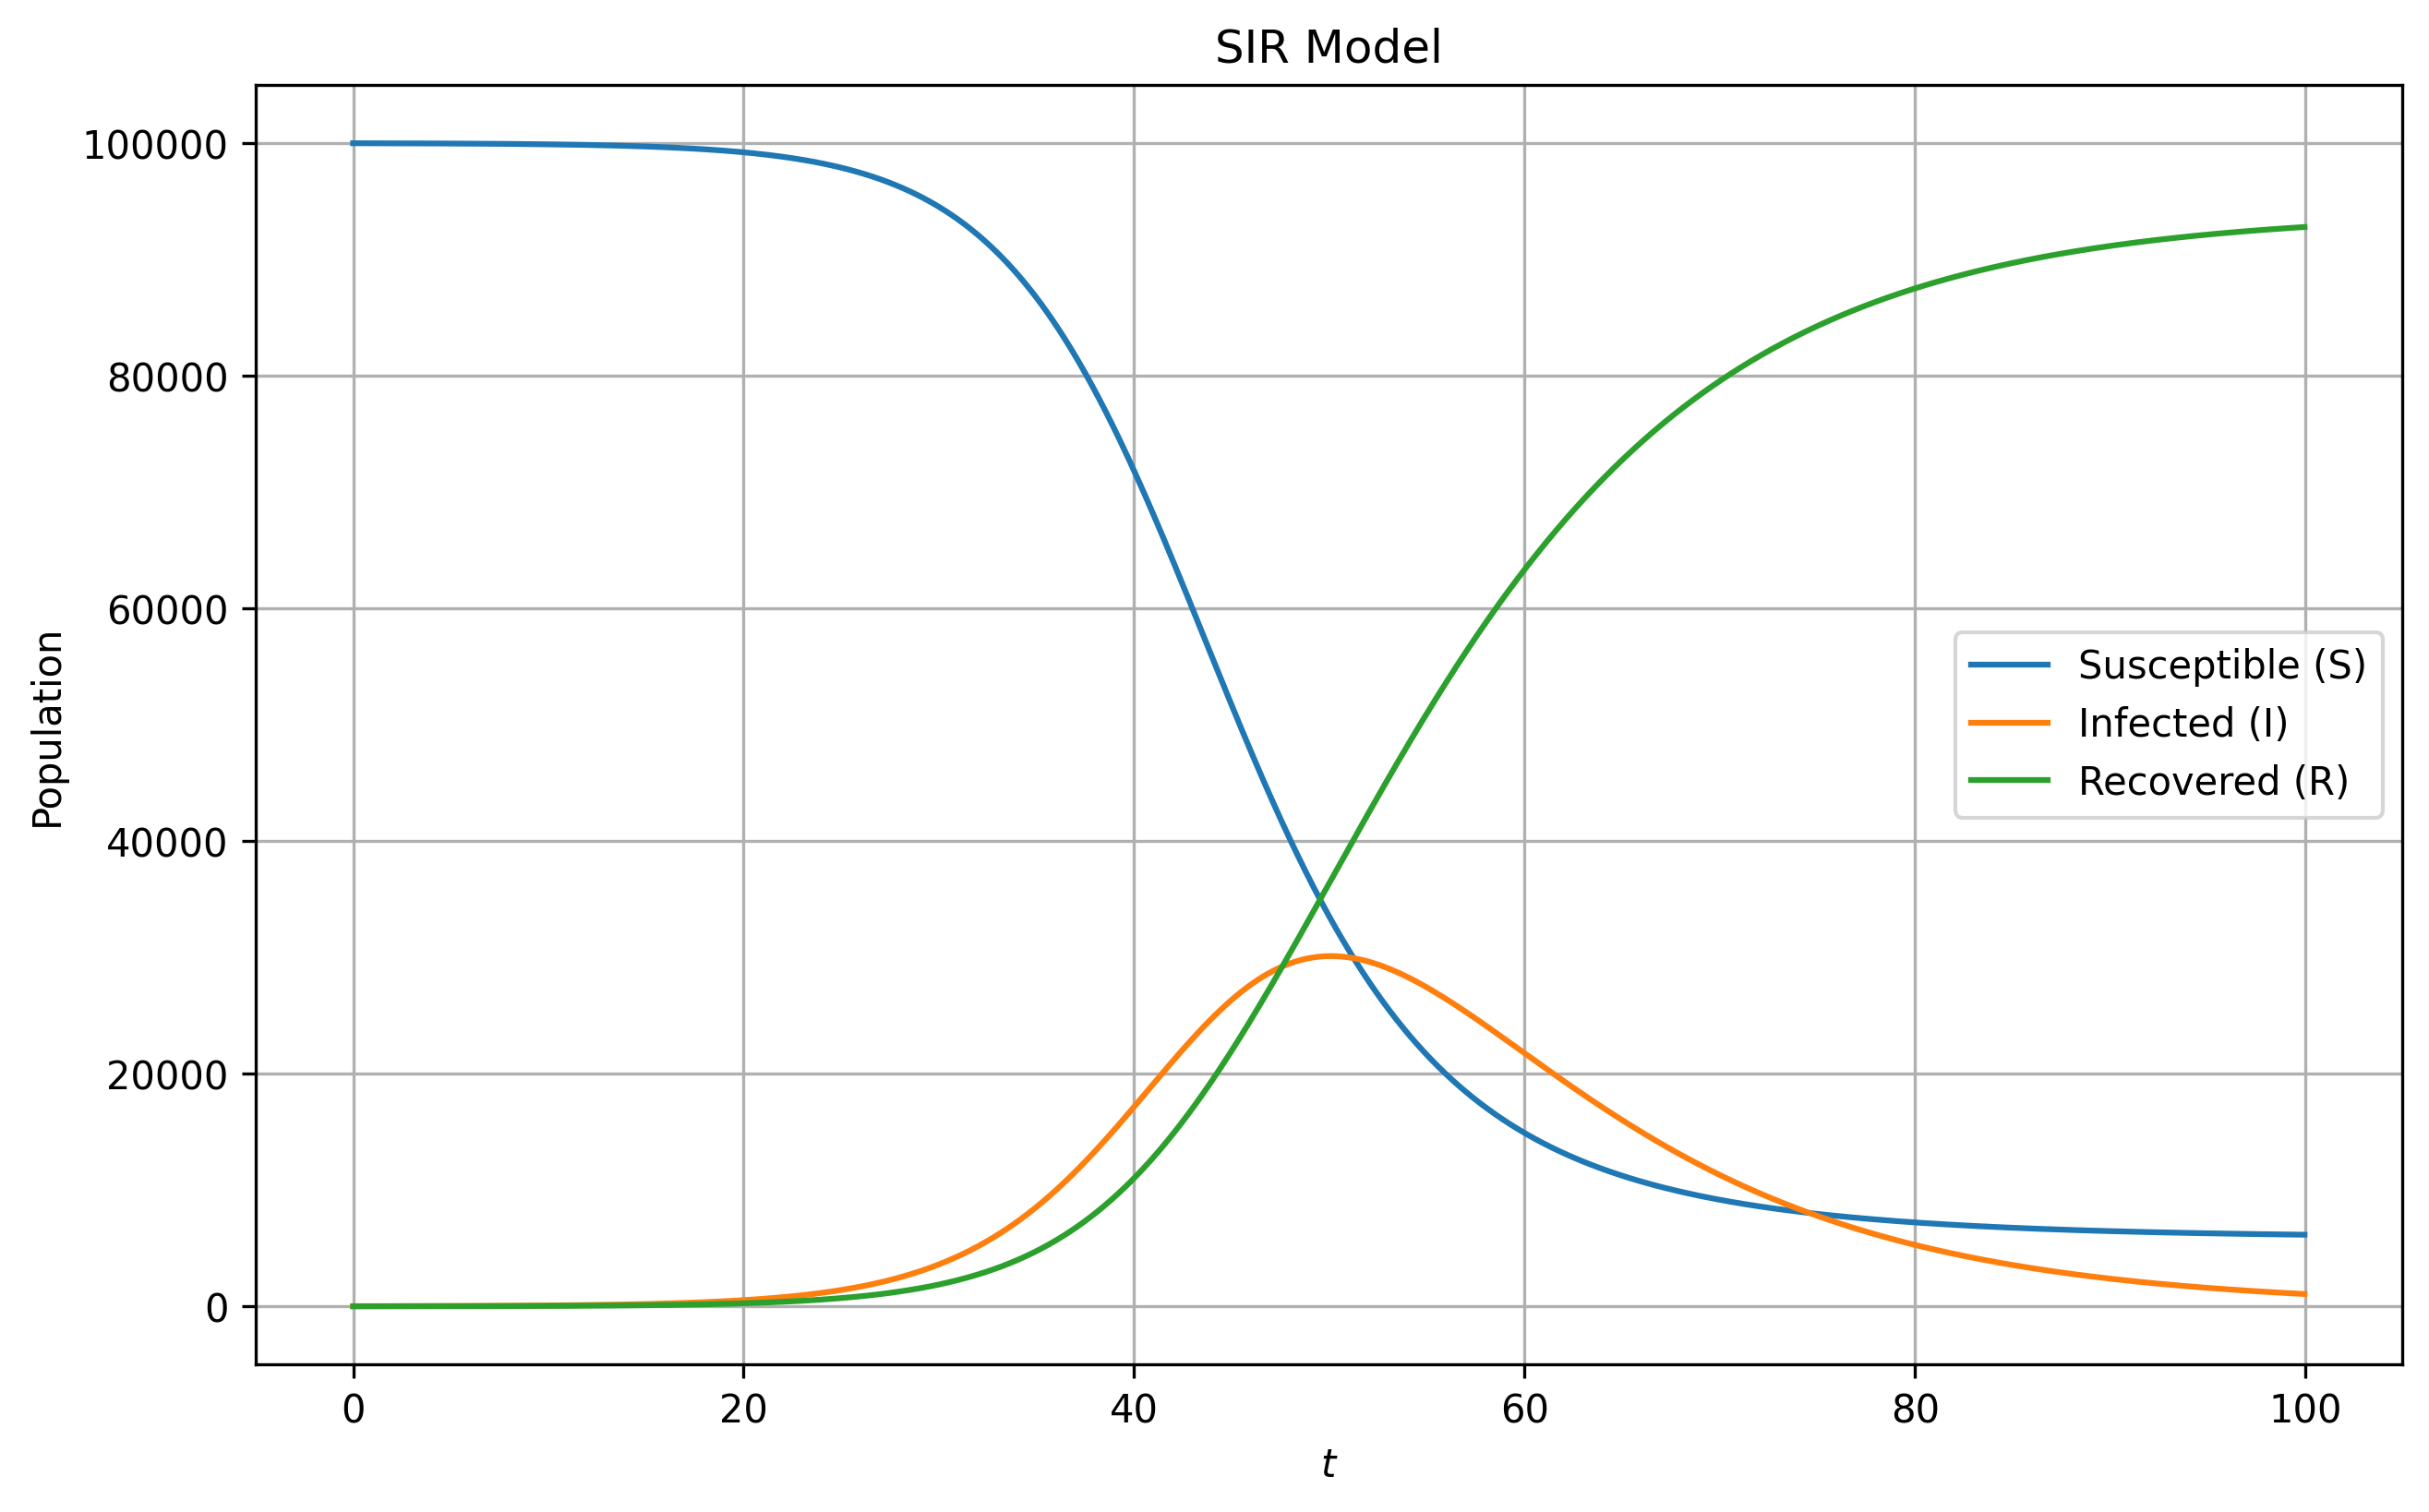

In [39]:
S, I, R, steps = sir_model(beta=0.3, mu=0.1, N=10**5, I0=10, T_final=100, dt=0.05)

# plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(steps, S, label='Susceptible (S)')
plt.plot(steps, I, label='Infected (I)')
plt.plot(steps, R, label='Recovered (R)')

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()

Test the threshold behavior of the SIR model:

$$R_0 = \beta / \mu > 1$$

Consider $100$ values of $R_0$ between $0$ and $4$.

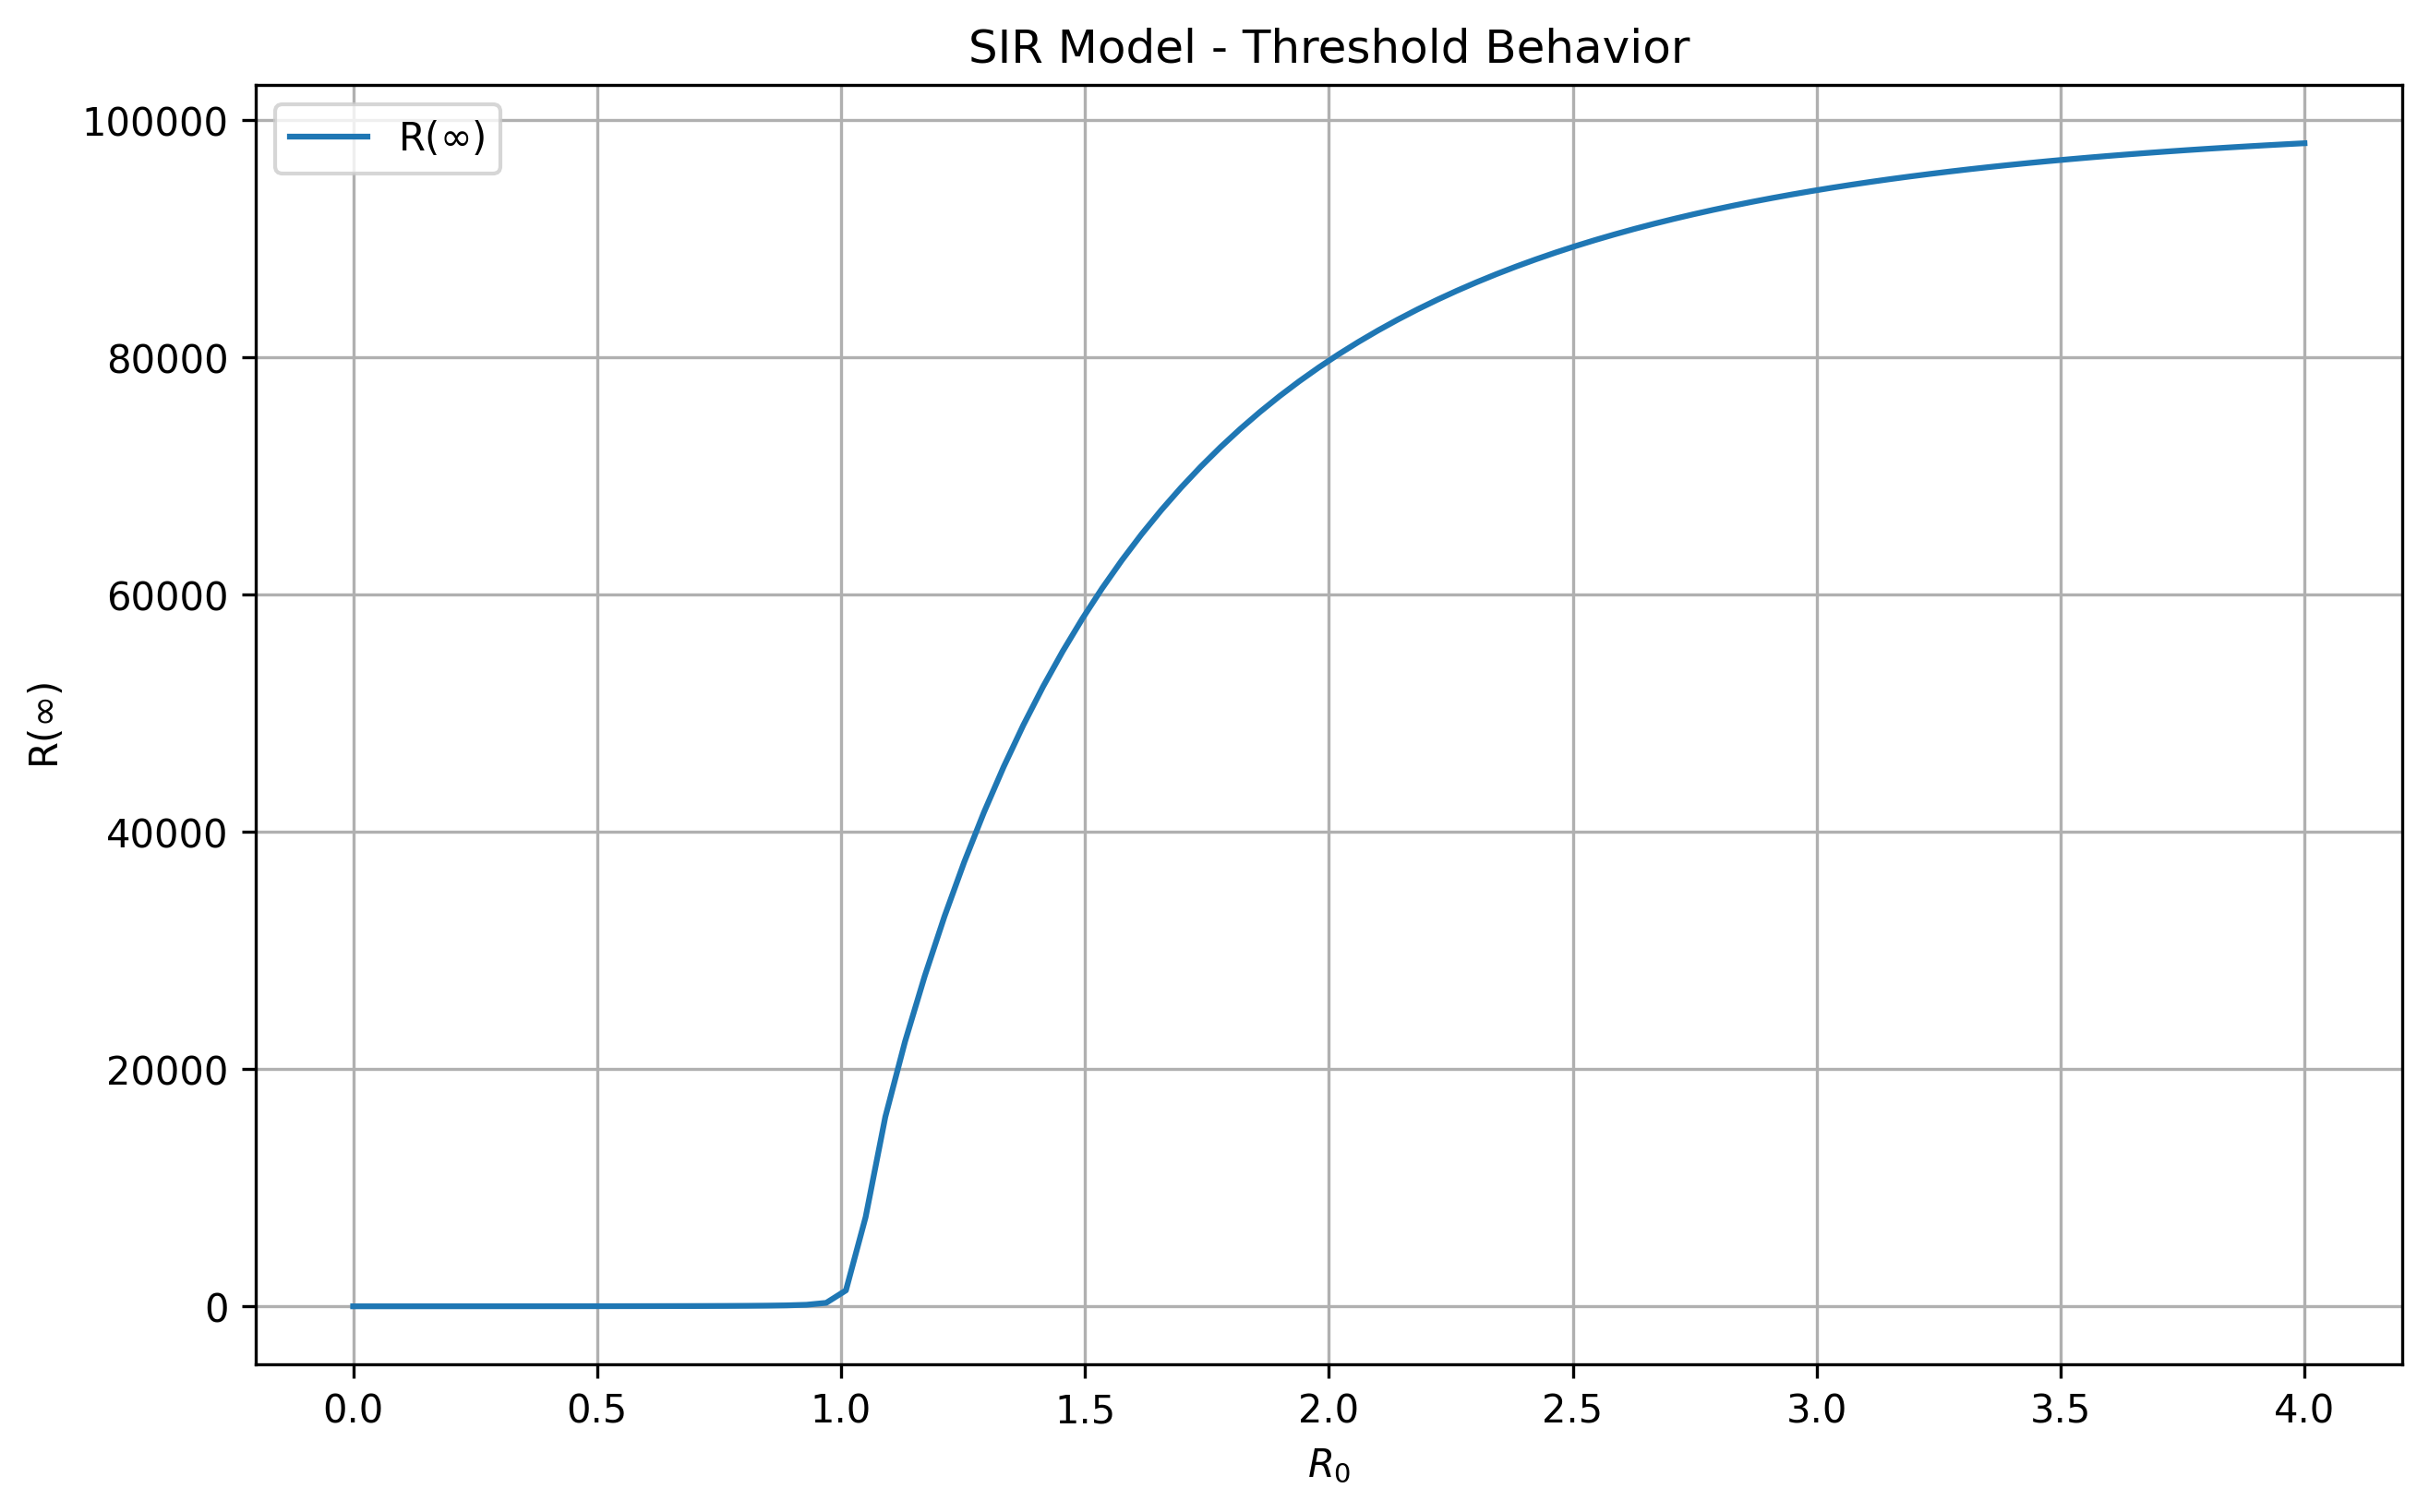

In [44]:
mu = 0.1
N, I0 = 10**5, 10

R0s = np.linspace(0, 4, 100)
R_inf = []
for R0 in R0s:
    beta = R0 * mu
    S, I, R, steps = sir_model(beta=beta, mu=mu, N=N, I0=I0, T_final=1000, dt=0.05)
    R_inf.append(R[-1])

# plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(R0s, R_inf, label='R($\infty$)')

plt.xlabel('$R_0$')
plt.ylabel('R($\infty$)')
plt.title('SIR Model - Threshold Behavior')
plt.legend()
plt.grid(True)
plt.show()

Test the validity of Equation for $R_{\infty}$ using $\texttt{scipy.optimize.fsolve}$ (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html):

$$ N - R(\infty) - S(0) e^{-\frac{R(\infty)}{N}R_0} = 0$$

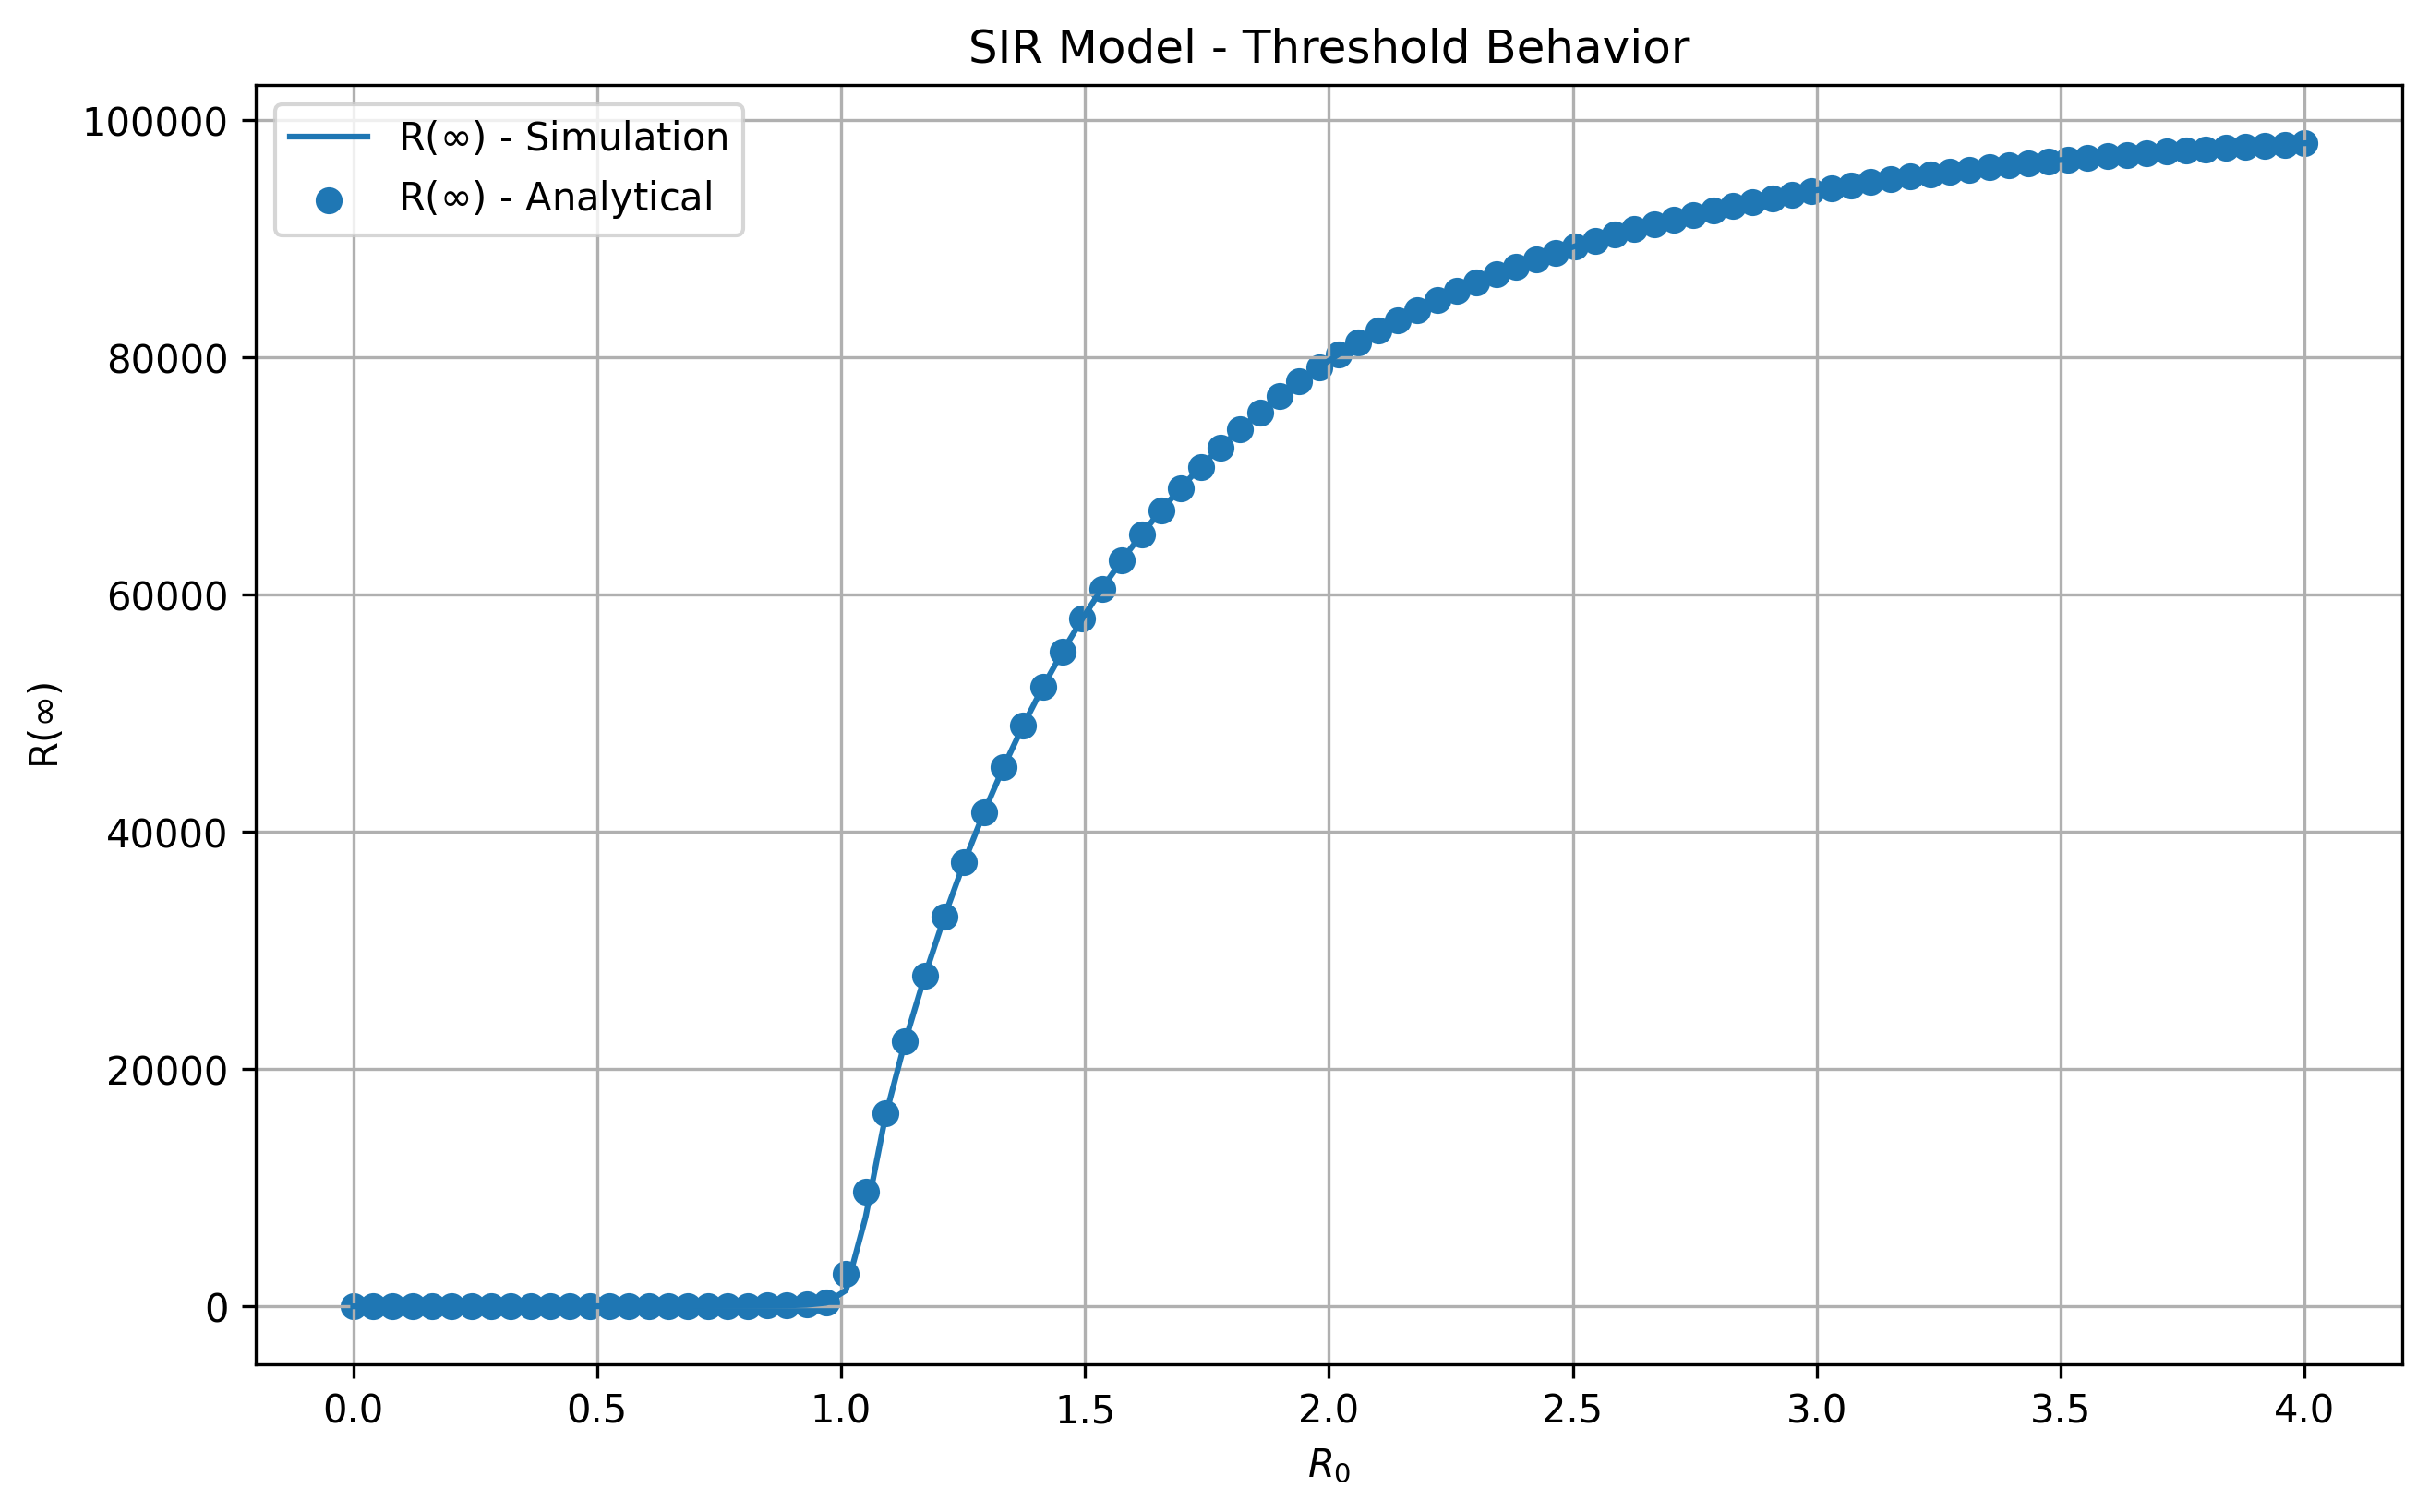

In [46]:
from scipy.optimize import fsolve

def r_inf_equation(r_inf, N, S0, R0): 
    return N - r_inf - S0 * np.exp(-r_inf / N * R0)

R_inf_analytical = []
for R0 in R0s:
    beta = R0 * mu
    R_inf_analytical.append(fsolve(r_inf_equation, N/2., args=(N, N - I0, beta / mu))[0])

# plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(R0s, R_inf, label='R($\infty$) - Simulation')
plt.scatter(R0s, R_inf_analytical, label='R($\infty$) - Analytical')
plt.xlabel('$R_0$')
plt.ylabel('R($\infty$)')
plt.title('SIR Model - Threshold Behavior')
plt.legend()
plt.grid(True)
plt.show()

Use $\texttt{scipy.integrate.odeint}$ (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to simulate the SIR model

In [48]:
from scipy.integrate import odeint

# define ODE system
def sir_model_ode(y, t, beta, mu, N): 
    dydt = [-beta * y[1] / N * y[0], 
            beta * y[1] / N * y[0] - mu * y[1], 
            mu * y[1]]
    return dydt
    
# initial conditions and parameters
beta, mu = 0.3, 0.1
N, I0 = 10**5, 10
y0 = [N - I0, I0, 0]
t = np.linspace(0, 100, 100)

# integrate
sol = odeint(sir_model_ode, y0, t, args=(beta, mu, N))

In [49]:
sol.shape

(100, 3)

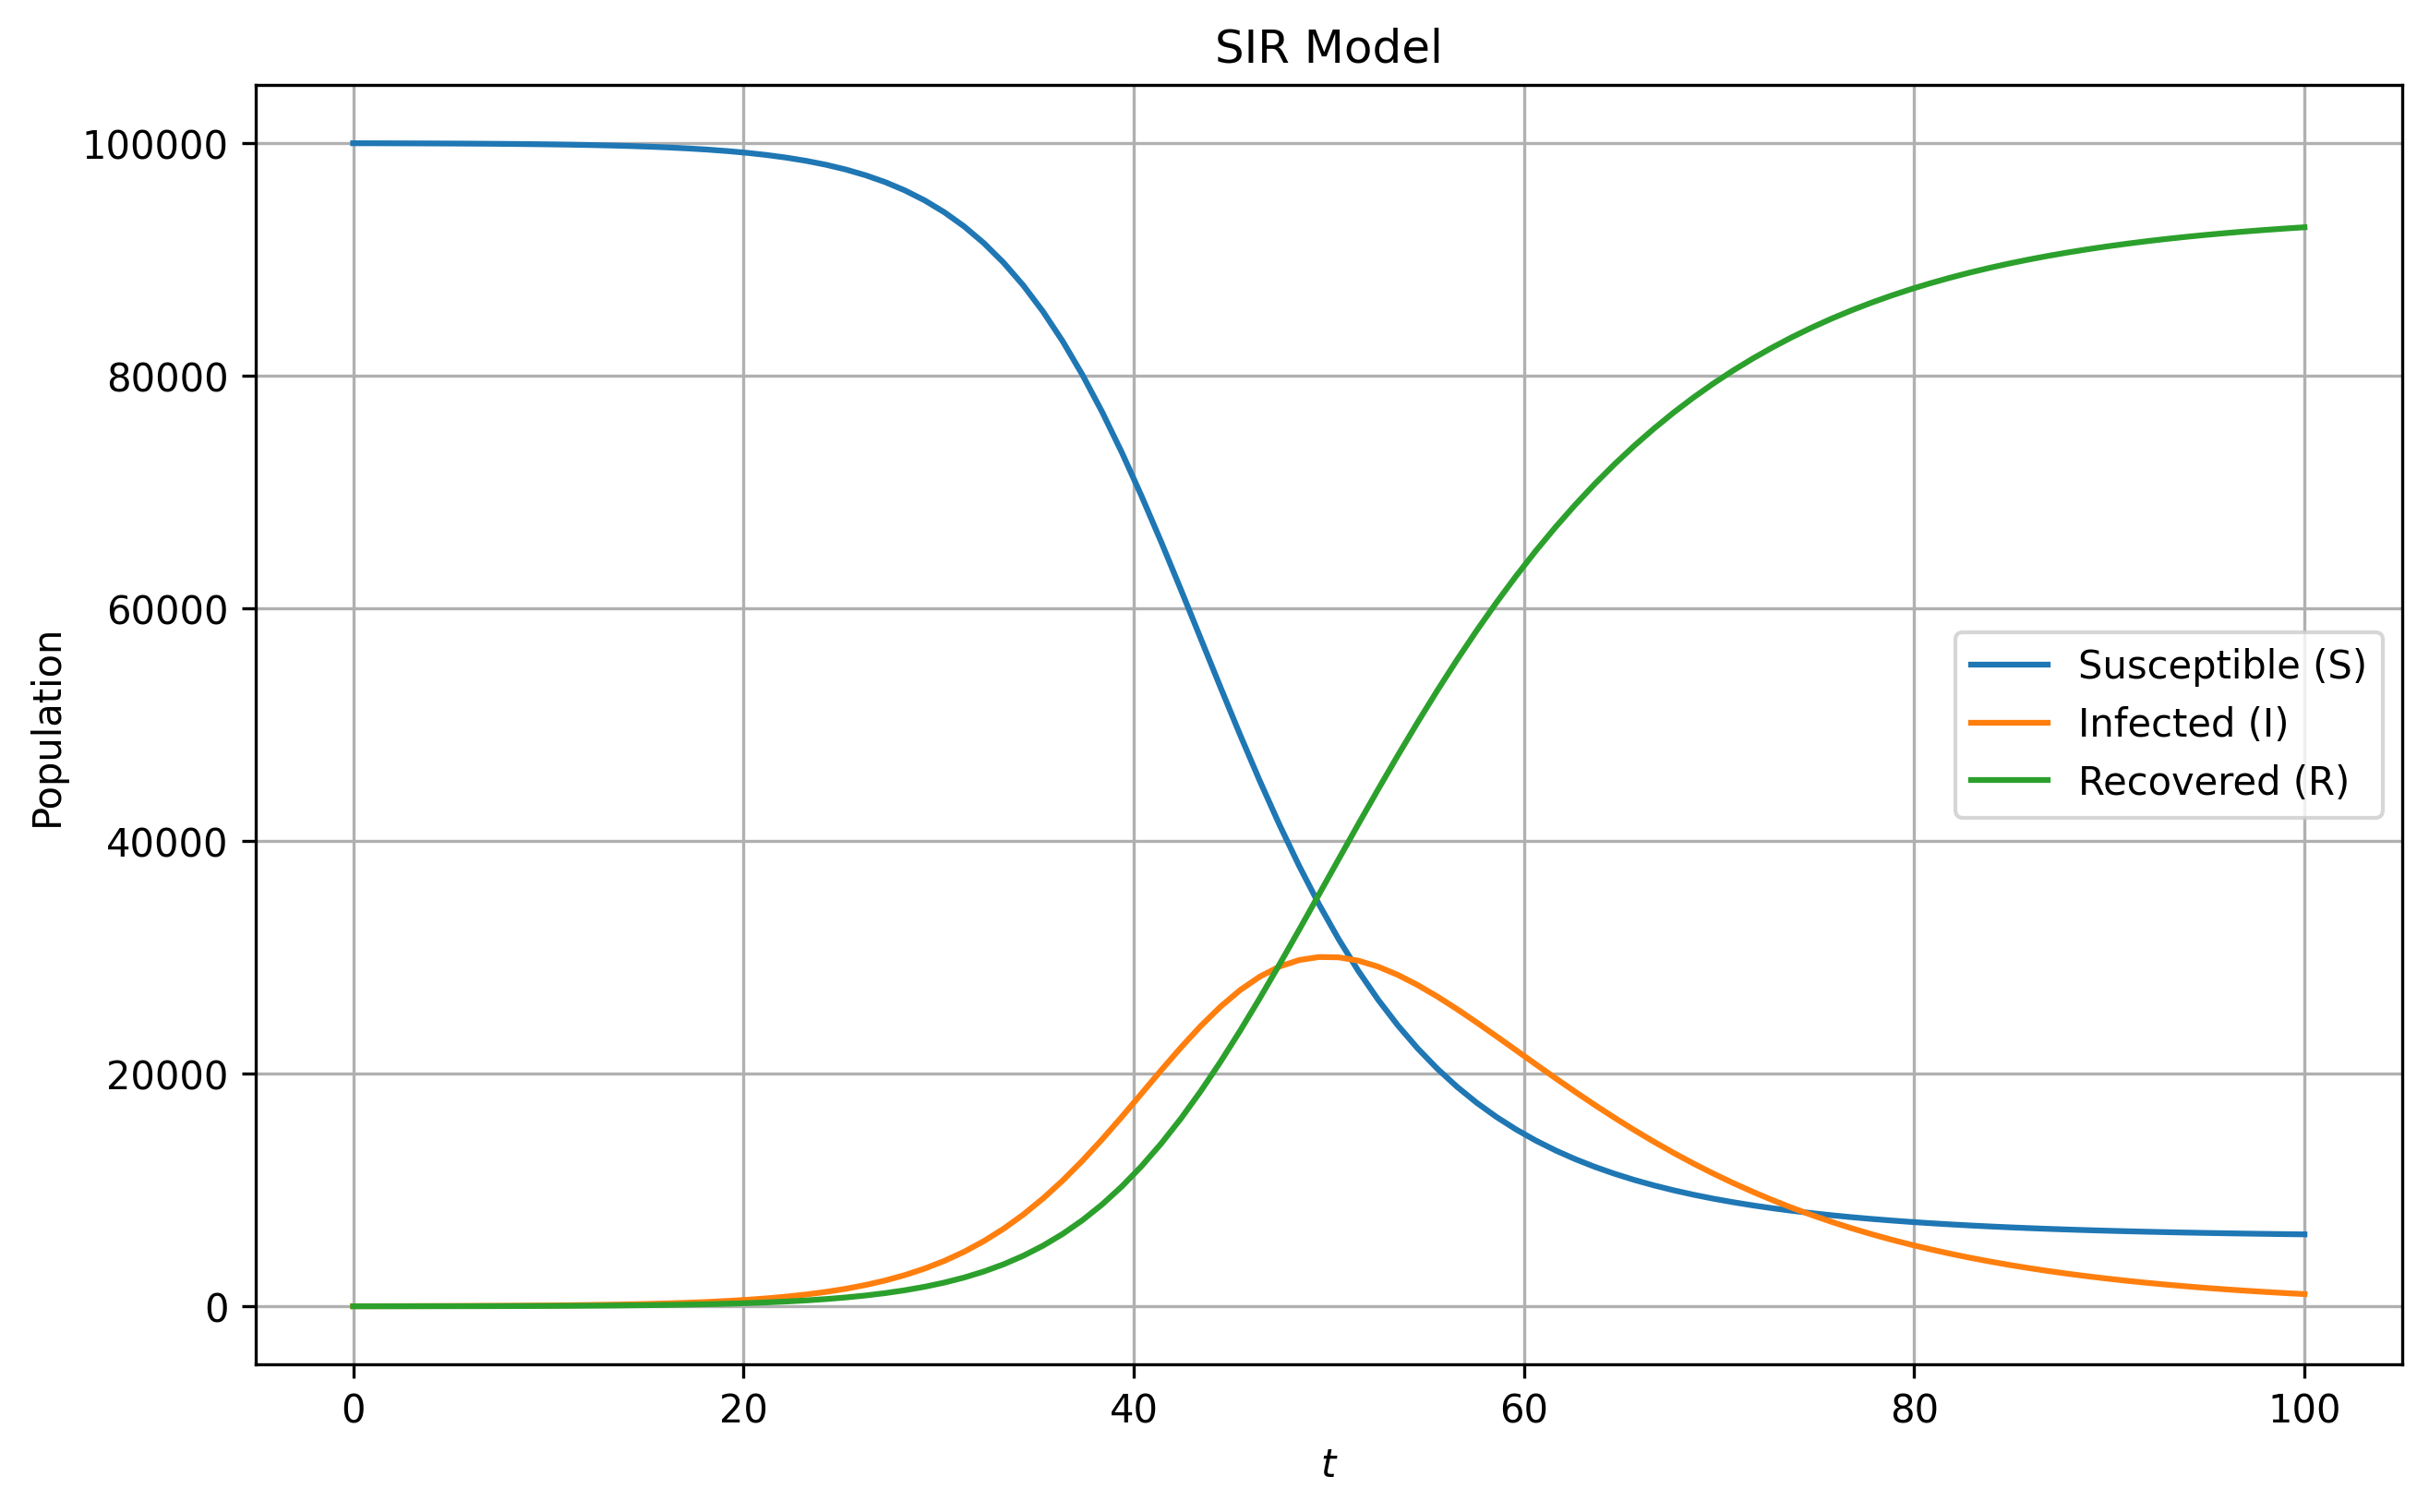

In [50]:
# plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t, sol[:, 0], label='Susceptible (S)')
plt.plot(t, sol[:, 1], label='Infected (I)')
plt.plot(t, sol[:, 2], label='Recovered (R)')

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()

# Stochastic SIR Model

Implement the Stochastic SIR model using chain binomial processes.

$$S + I \rightarrow_{\beta} 2I$$
$$I \rightarrow_{\mu} R$$

Plot the results of single realization, and the results of 100 realizations

Consider: 
- $\beta = 0.3$
- $\mu = 0.1$
- $N=10^3$
- $I_0=5$
- $T_{final}=100$
- $dt=0.05$

In [4]:
def stochastic_sir_model(beta, mu, N, I0, T_final, dt=1):
    """
    Function to simulate the stochastic SIR model.

    Parameters:
        beta (float): Infection rate
        gamma (float): Recovery rate
        N (int): Total population size
        I0 (int): Initial number of infected individuals
        T_final (float): Final time to simulate

    Returns:
        S (array): Array of susceptible individuals over time
        I (array): Array of infected individuals over time
        R (array): Array of recovered individuals over time
        steps (array): Array of time steps over time
    """
    # define time steps
    steps = np.arange(0, T_final, dt)
    
    # initialization
    S = []
    I = []
    R = []
    
    I.append(I0)
    S.append(N - I0)
    R.append(0)
    
    # simulation
    for i, step in enumerate(steps[1:]):
    #for i in range(len(steps) - 1):
    
        infected = np.random.binomial(S[i], beta * I[i] / N * dt)
        recovered = np.random.binomial(I[i], mu * dt)
        
        S.append(S[i] - infected)
        I.append(I[i] + infected - recovered)
        R.append(R[i] + recovered)
    
    return S, I, R, steps


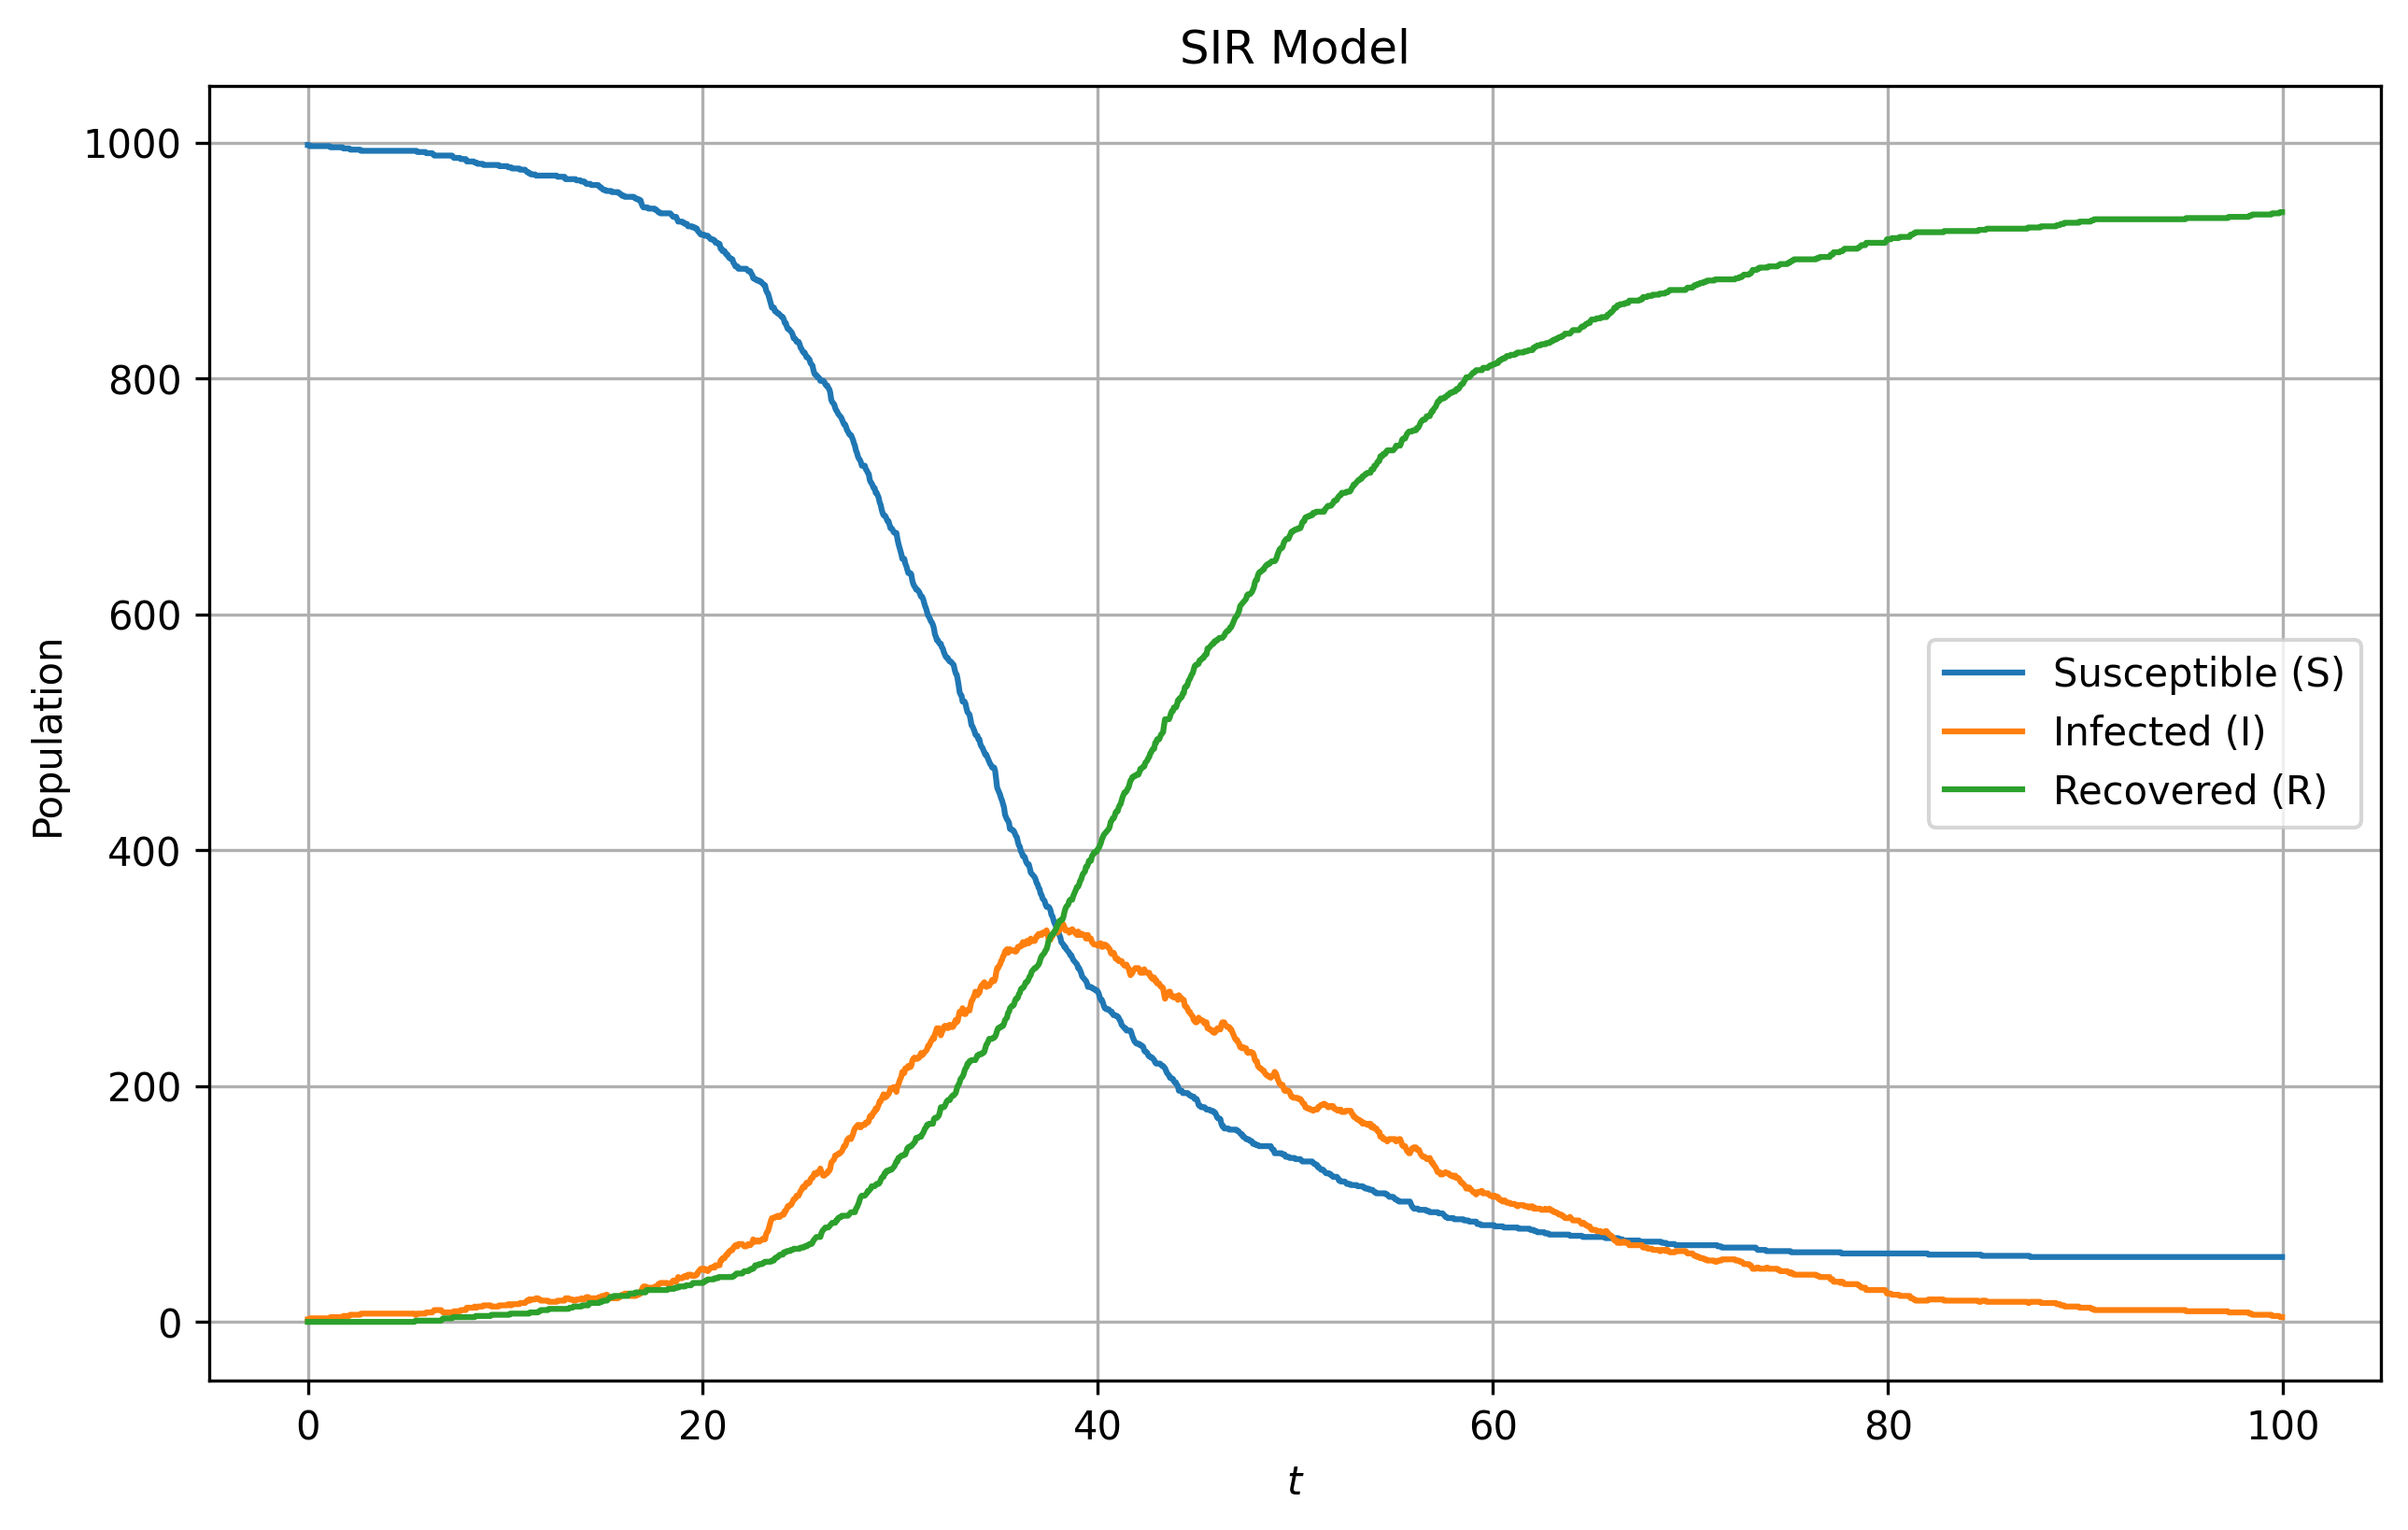

In [7]:
S, I, R, steps = stochastic_sir_model(beta=0.3, mu=0.1, N=10**3, I0=2, T_final=100, dt=0.05)

# plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(steps, S, label='Susceptible (S)')
plt.plot(steps, I, label='Infected (I)')
plt.plot(steps, R, label='Recovered (R)')

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()

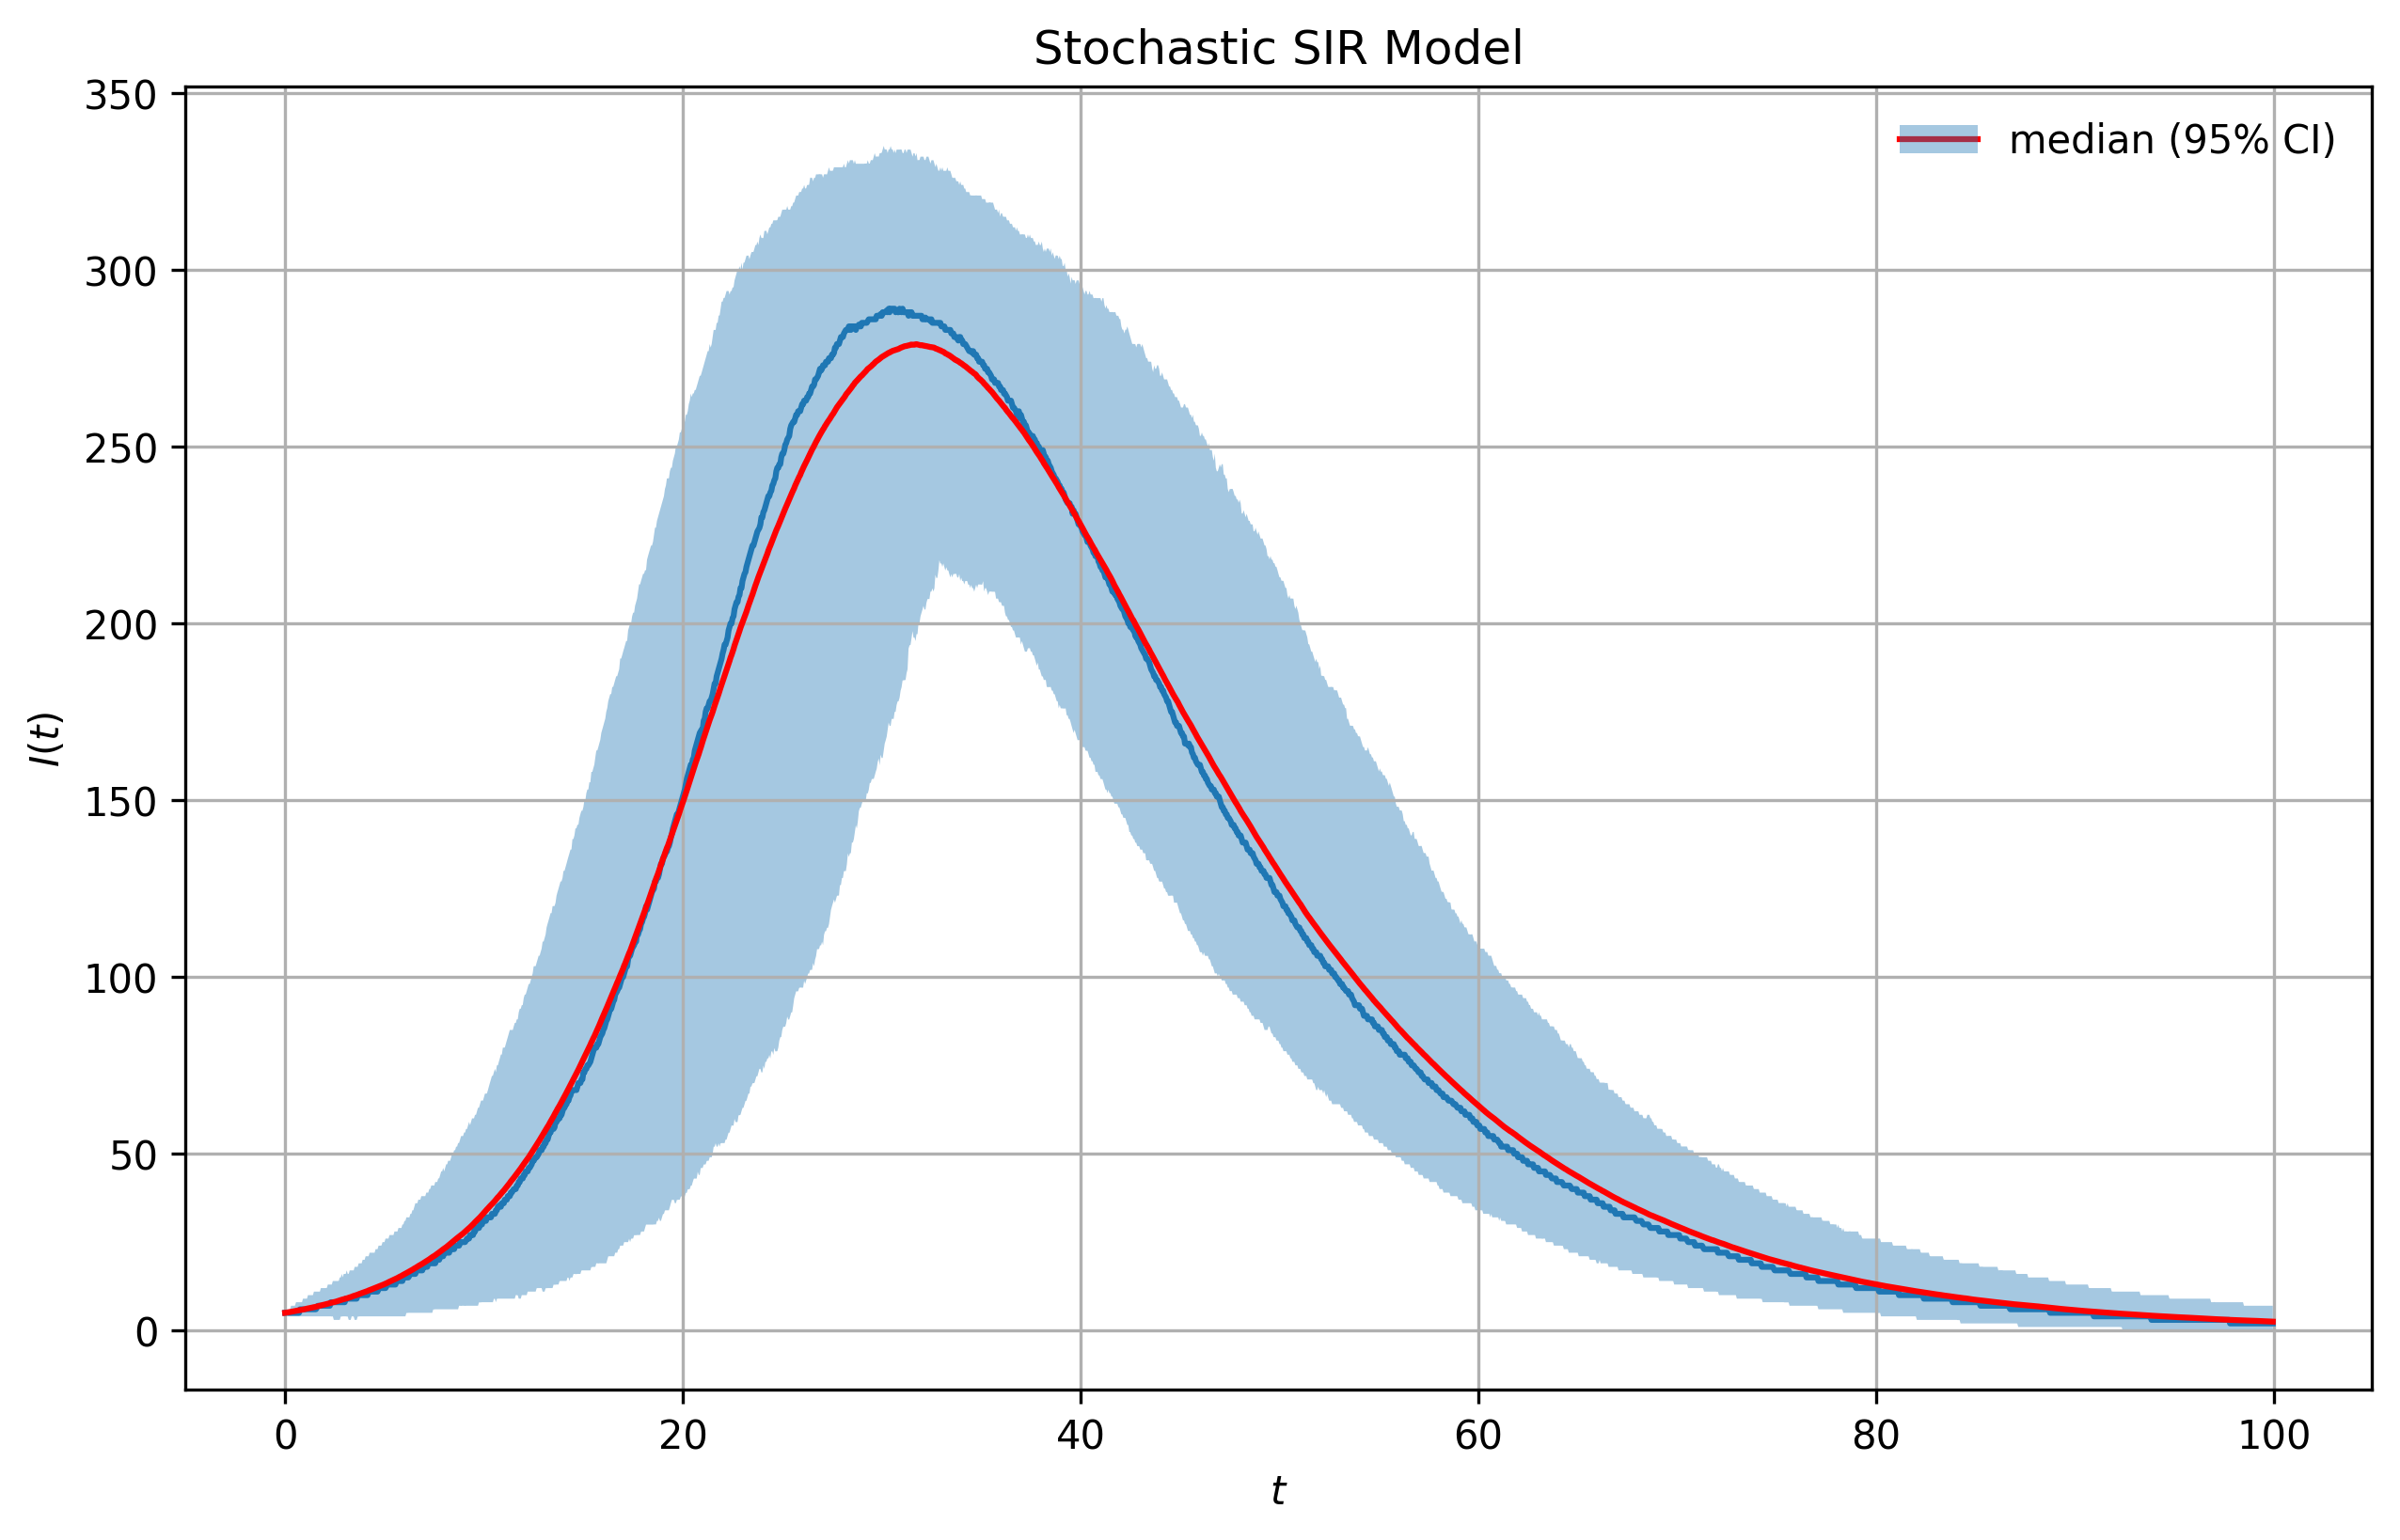

In [11]:
infected = []
for i in range(1000):
    S, I, R, steps = stochastic_sir_model(beta=0.3, mu=0.1, N=10**3, I0=5, T_final=100, dt=0.05)
    infected.append(I)

infected = np.array(infected)
plt.figure(figsize=(10, 6), dpi=300)
p1, = plt.plot(steps, np.quantile(infected, 0.5, axis=0))
p1, = plt.plot(steps, np.mean(infected, axis=0), color="r")

p2 = plt.fill_between(steps, np.quantile(infected, 0.05, axis=0), 
                             np.quantile(infected, 0.95, axis=0), alpha=0.4, linewidth=0.)
plt.legend([(p1, p2)], ['median (95% CI)'], frameon=False)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.title('Stochastic SIR Model')
plt.grid(True)
plt.show()

In [10]:
infected.shape

(1000, 2000)